# Employee detection

## Create ML models to predict the ‘No. of hours absent’ with minimum MSE and RMSE and maximum R-Square score. Build the following models:
### 1.	Multiple Linear Regressor (MLR)
### 2.	Random Forest Regressor (RFR)
### 3.	MLR with PCA
### 4.	RFR with PCA


## Important libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

## Loading the dataset 

In [2]:
df = pd.read_csv("MFGEmployees4.csv")

### Viewing the dataset

In [3]:
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [4]:
col_names = df.columns.to_list()
print(col_names)

['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService', 'AbsentHours', 'BusinessUnit']


In [5]:
df.shape

(8336, 13)

***The Given data has 8336 rows and 13 columns. The columns in the dataframe has shown above. The dataframe has the datatype of int,float, str*** 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


### Data Type Preprocessing

***Converting the float datatype into int datatype for the downstream analysis***

In [7]:
df["Age"]= df["Age"].astype(int)
df["LengthService"]=df["LengthService"].astype(int)
df["AbsentHours"]=df["AbsentHours"].astype(int)
df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32,6,36,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40,5,30,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48,4,83,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44,3,70,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35,3,0,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46,4,93,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34,2,0,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58,4,176,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43,6,60,Stores


### Count for NAN values

In [8]:
def count_na(datafrme,col_names):
    count = {}
    for i in col_names:
        value = df[i].isna().sum()
        count[i]= value
    dataframe = pd.DataFrame([count])
    return dataframe

In [9]:
count_na(df,col_names)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Check for the Duplicates

In [10]:
df.duplicated().sum()

0

### Understanding the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  8336 non-null   int64 
 1   Surname         8336 non-null   object
 2   GivenName       8336 non-null   object
 3   Gender          8336 non-null   object
 4   City            8336 non-null   object
 5   JobTitle        8336 non-null   object
 6   DepartmentName  8336 non-null   object
 7   StoreLocation   8336 non-null   object
 8   Division        8336 non-null   object
 9   Age             8336 non-null   int32 
 10  LengthService   8336 non-null   int32 
 11  AbsentHours     8336 non-null   int32 
 12  BusinessUnit    8336 non-null   object
dtypes: int32(3), int64(1), object(9)
memory usage: 749.1+ KB


In [12]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,41.502039,4.281310,60.868282
std,2406.540255,9.948626,2.477186,48.943099
min,1.000000,3.000000,0.000000,0.000000
25%,2084.750000,35.000000,3.000000,19.000000
50%,4168.500000,42.000000,4.000000,55.500000
75%,6252.250000,48.000000,5.000000,94.000000
max,8336.000000,77.000000,43.000000,272.000000


### Getting the unique values

In [13]:
def count_unique(datafrme,col_names):
    count = {}
    for i in col_names:
        value = len(df[i].unique().tolist())
        count[i]= value
    dataframe = pd.DataFrame([count])
    return dataframe

In [14]:



count_unique(df,col_names)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,8336,4051,1625,2,243,47,21,40,6,68,37,237,2


## Ploting the datas in categorical values

In [15]:
df

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32,6,36,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40,5,30,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48,4,83,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44,3,70,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35,3,0,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46,4,93,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34,2,0,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58,4,176,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43,6,60,Stores


In [16]:
data  = df.drop(["EmployeeNumber","Surname","GivenName"],axis=1)

<Figure size 1400x1200 with 0 Axes>

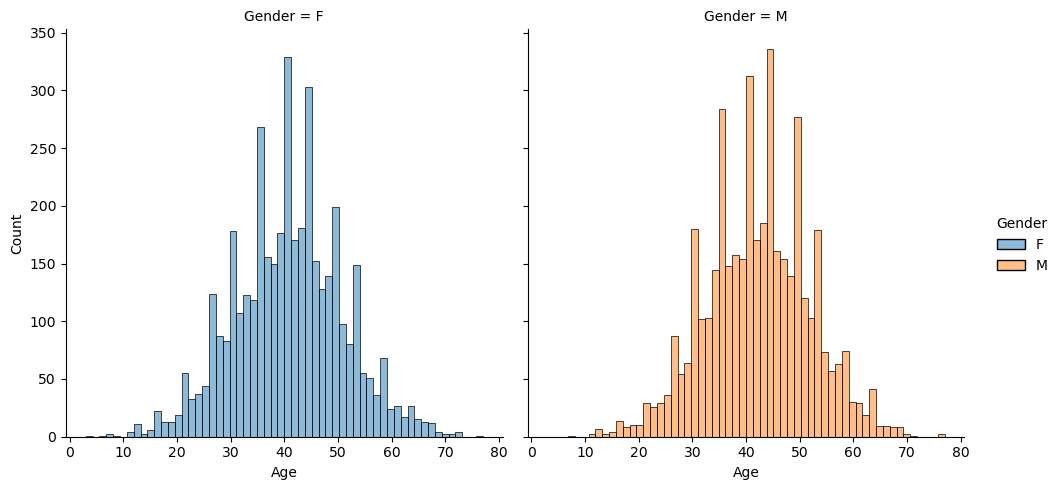

In [17]:
plt.figure(figsize=(14,12 ))
ax = sns.displot(data=data, x="Age", hue="Gender", col="Gender")
plt.show()

<Figure size 1400x1200 with 0 Axes>

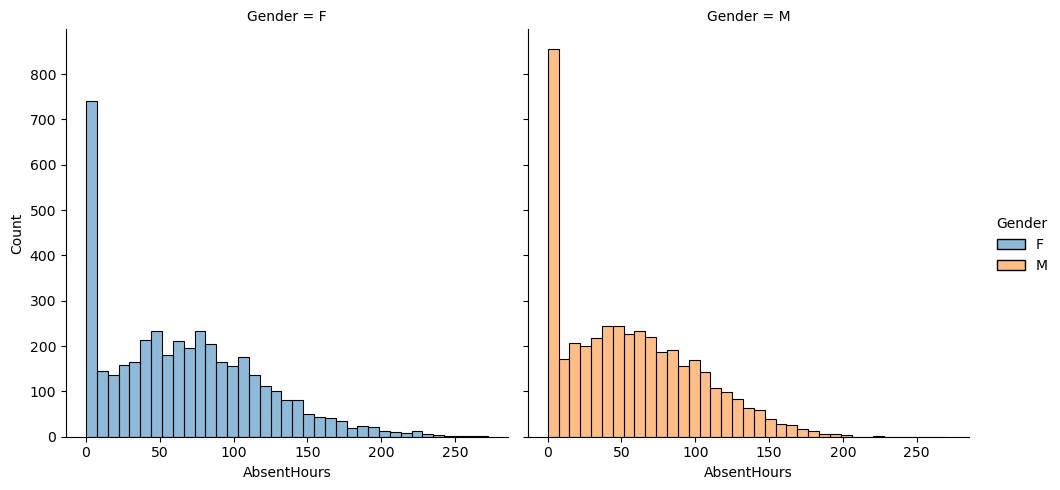

In [18]:
plt.figure(figsize=(14,12))
ax = sns.displot(data=data, x="AbsentHours", hue="Gender", col="Gender")
plt.show()

<Figure size 1400x1200 with 0 Axes>

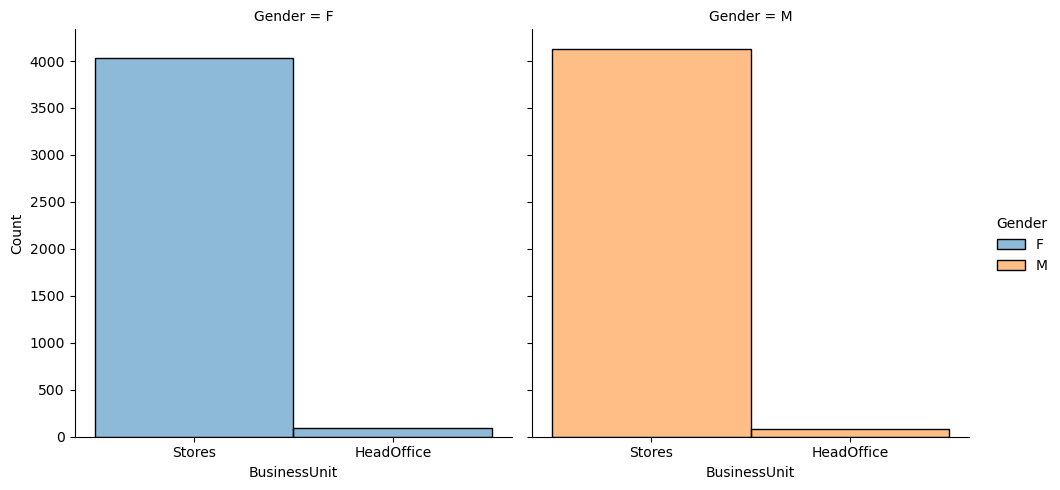

In [19]:
plt.figure(figsize=(14,12 ))
ax = sns.displot(data=data, x="BusinessUnit", hue="Gender", col="Gender")
plt.show()

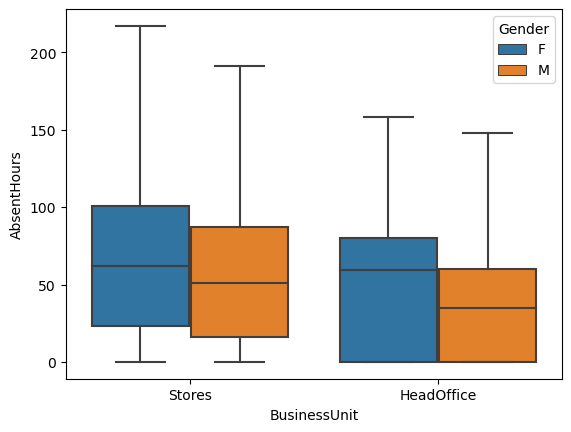

In [20]:
sns.boxplot(data=data, x="BusinessUnit", y="AbsentHours", hue="Gender",showfliers = False)
plt.show()

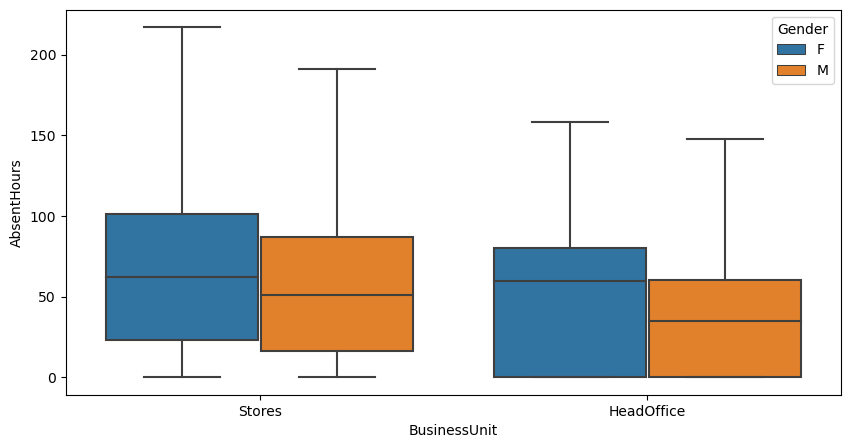

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="BusinessUnit", y="AbsentHours", hue="Gender",showfliers = False)
plt.show()

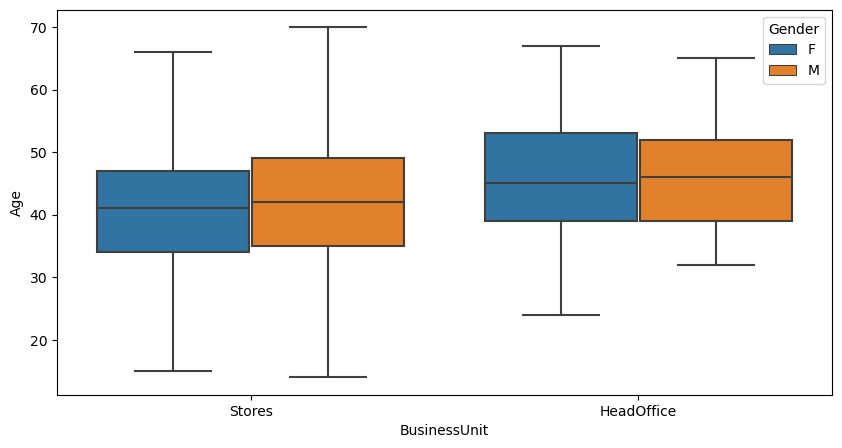

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="BusinessUnit", y="Age", hue="Gender",showfliers = False)
plt.show()

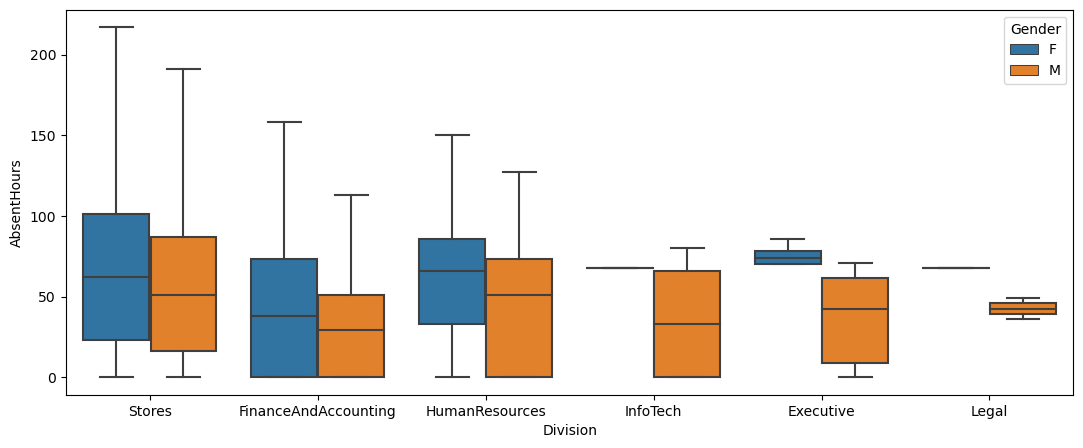

In [23]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=data, x="Division", y="AbsentHours", hue="Gender",showfliers = False)
plt.show()

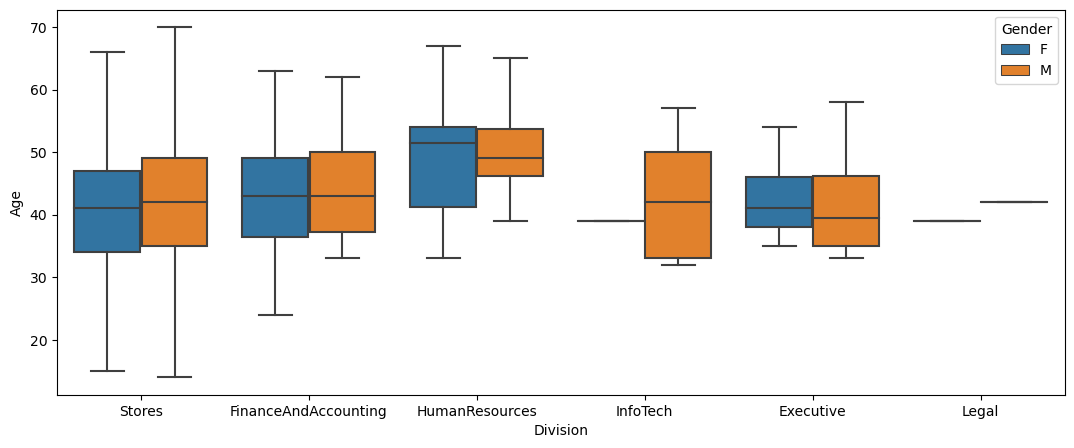

In [24]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=data, x="Division", y="Age", hue="Gender",showfliers = False)
plt.show()

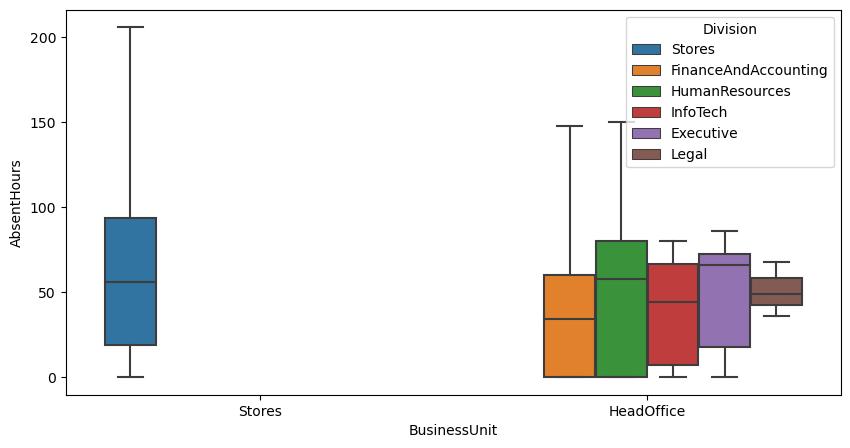

In [25]:

plt.figure(figsize=(10, 5))
ax =sns.boxplot(data=data, x="BusinessUnit", y="AbsentHours", hue="Division",showfliers = False)
plt.show()

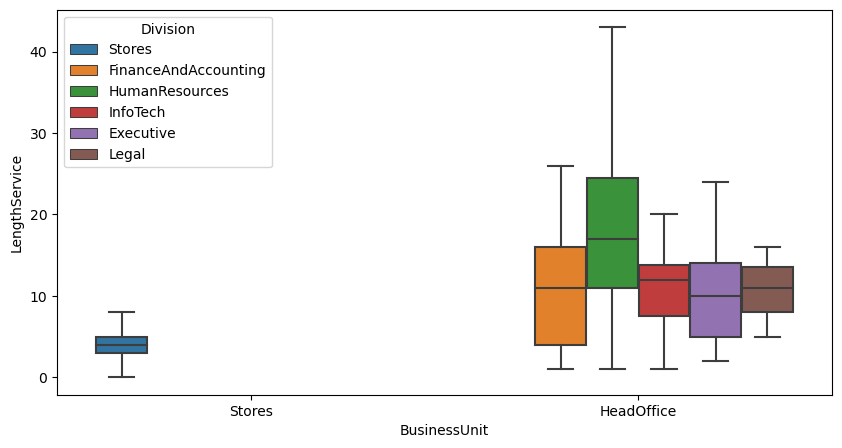

In [26]:
plt.figure(figsize=(10, 5))
ax =sns.boxplot(data=data, x="BusinessUnit", y="LengthService", hue="Division",showfliers = False)
plt.show()

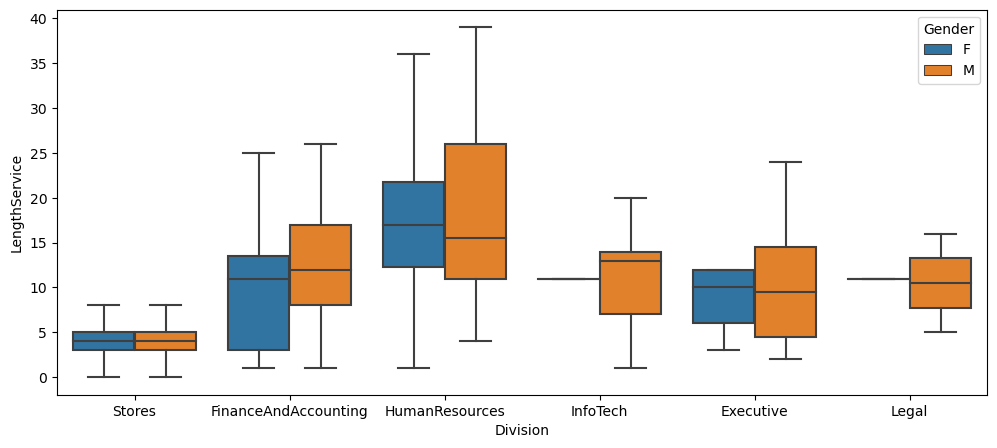

In [27]:
plt.figure(figsize=(12, 5))
ax =sns.boxplot(data=data, x="Division", y="LengthService", hue="Gender",showfliers = False)
plt.show()

<Figure size 1800x2500 with 0 Axes>

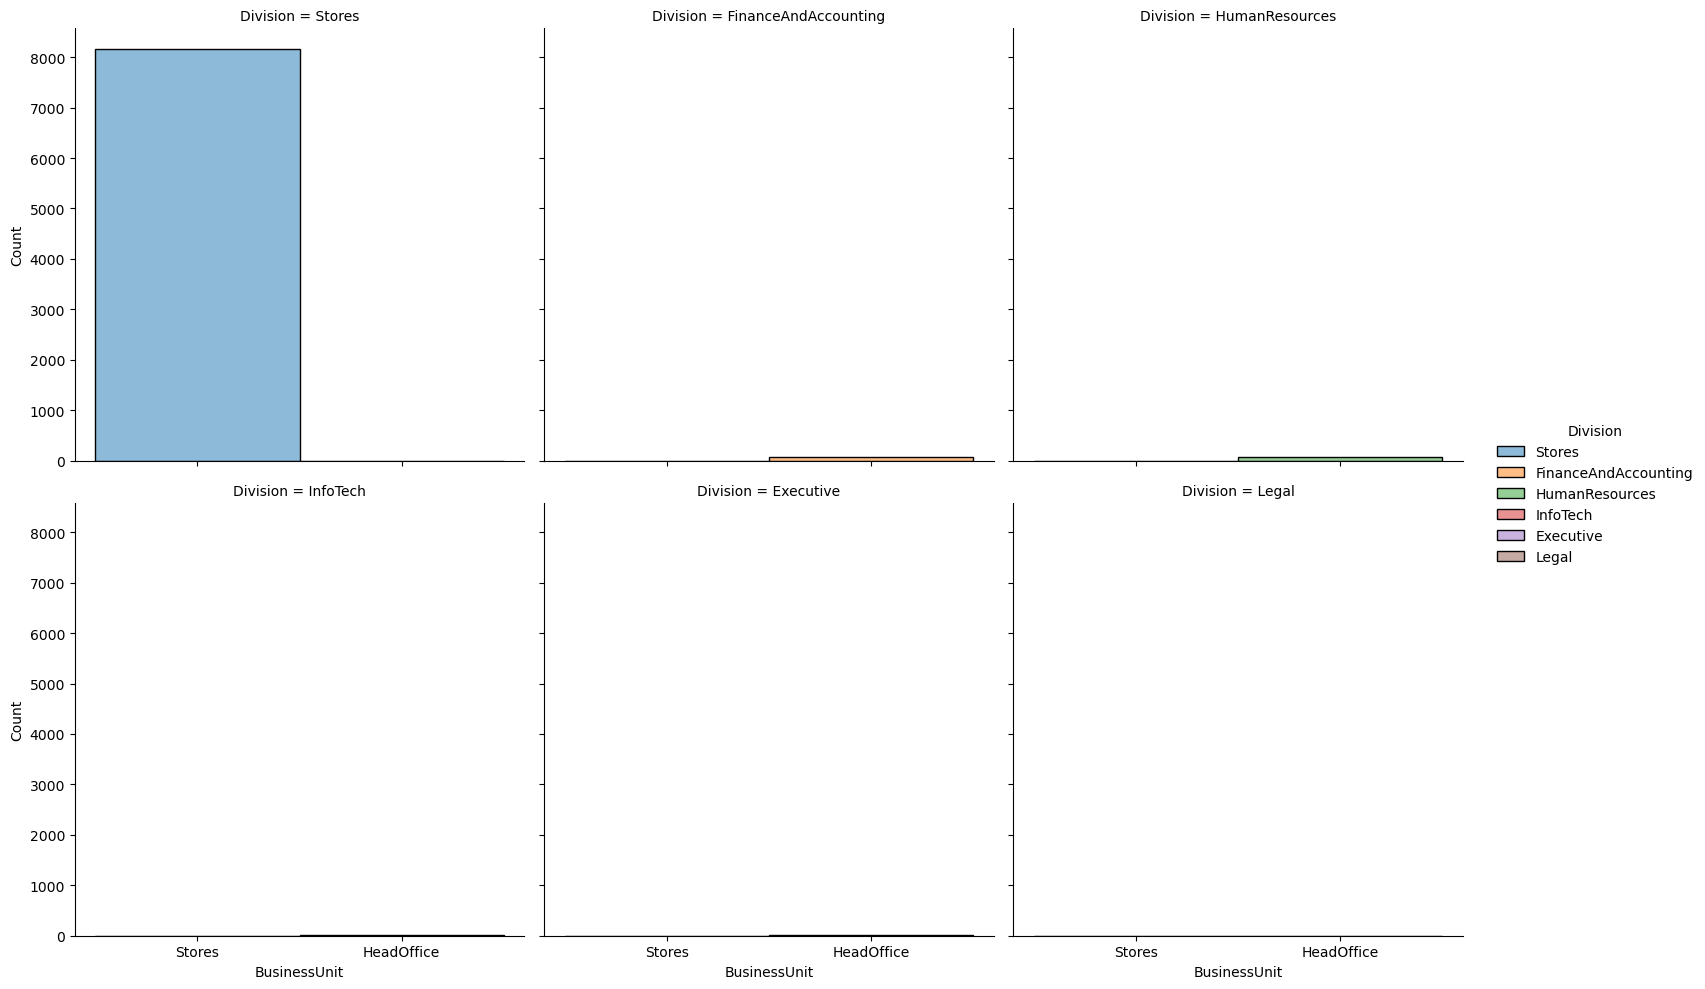

In [28]:
plt.figure(figsize=(18, 25))
ax = sns.displot(data=data, x="BusinessUnit", hue="Division", col="Division",col_wrap=3)
plt.show()

<Figure size 1800x2500 with 0 Axes>

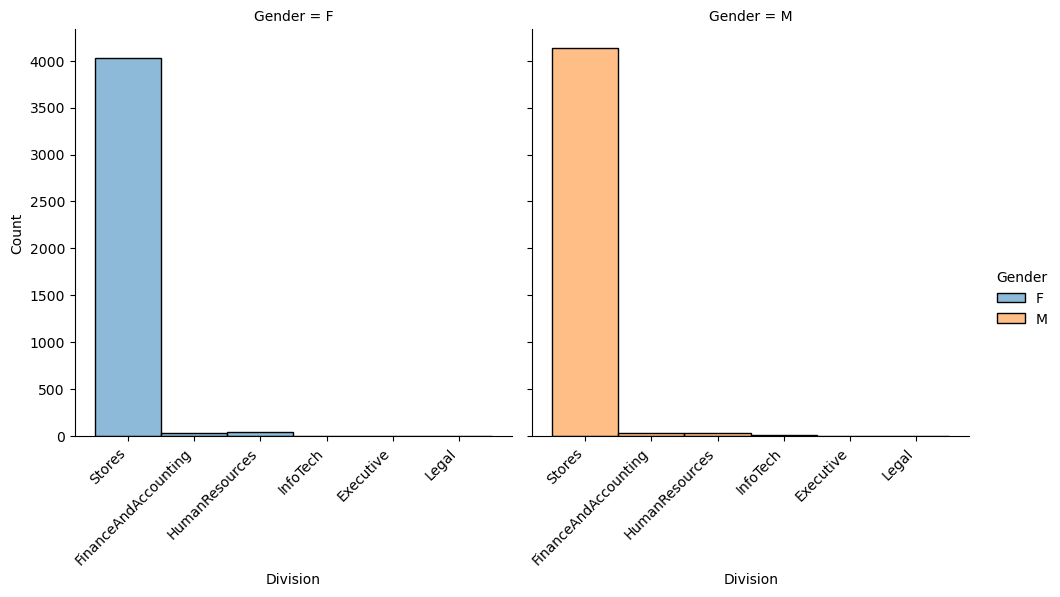

In [29]:
plt.figure(figsize=(18, 25))
ax = sns.displot(data=data, x="Division", hue="Gender", col="Gender")
ax.set_xticklabels(rotation=45, ha='right')
plt.show()

<Figure size 1800x2500 with 0 Axes>

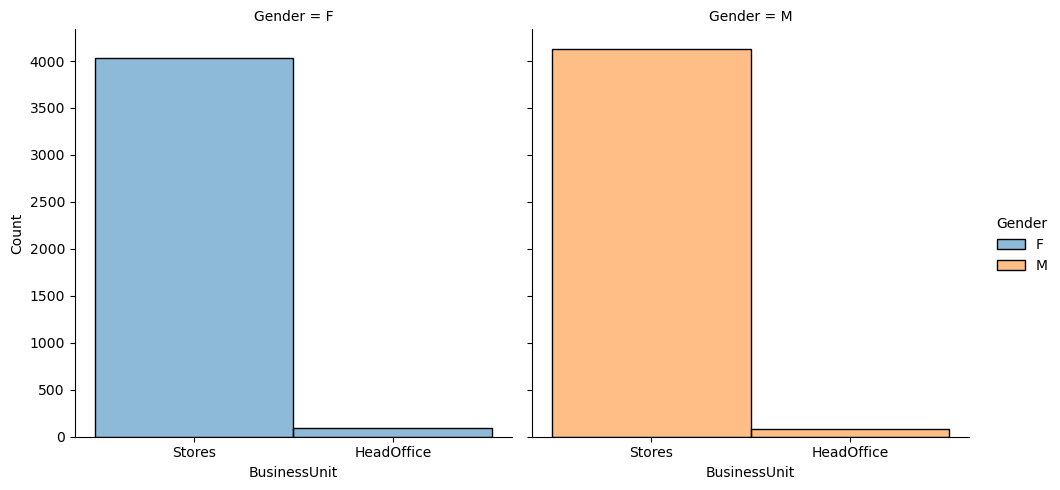

In [30]:
plt.figure(figsize=(18, 25))
ax = sns.displot(data=data, x="BusinessUnit", hue="Gender", col="Gender")
plt.show()

<Figure size 1800x2500 with 0 Axes>

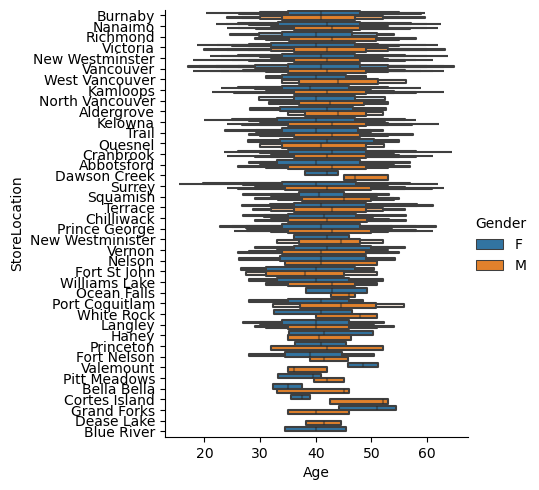

In [31]:
plt.figure(figsize=(18, 25))
ax = sns.catplot(data=df, x="Age", y="StoreLocation", hue="Gender", kind="boxen",showfliers = False)
plt.show()

<Figure size 1800x2500 with 0 Axes>

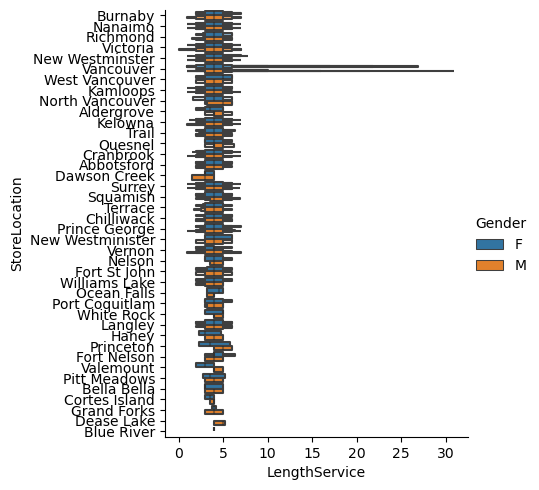

In [32]:
plt.figure(figsize=(18, 25))
ax = sns.catplot(data=df, x="LengthService", y="StoreLocation", hue="Gender", kind="boxen",showfliers = False)
plt.show()

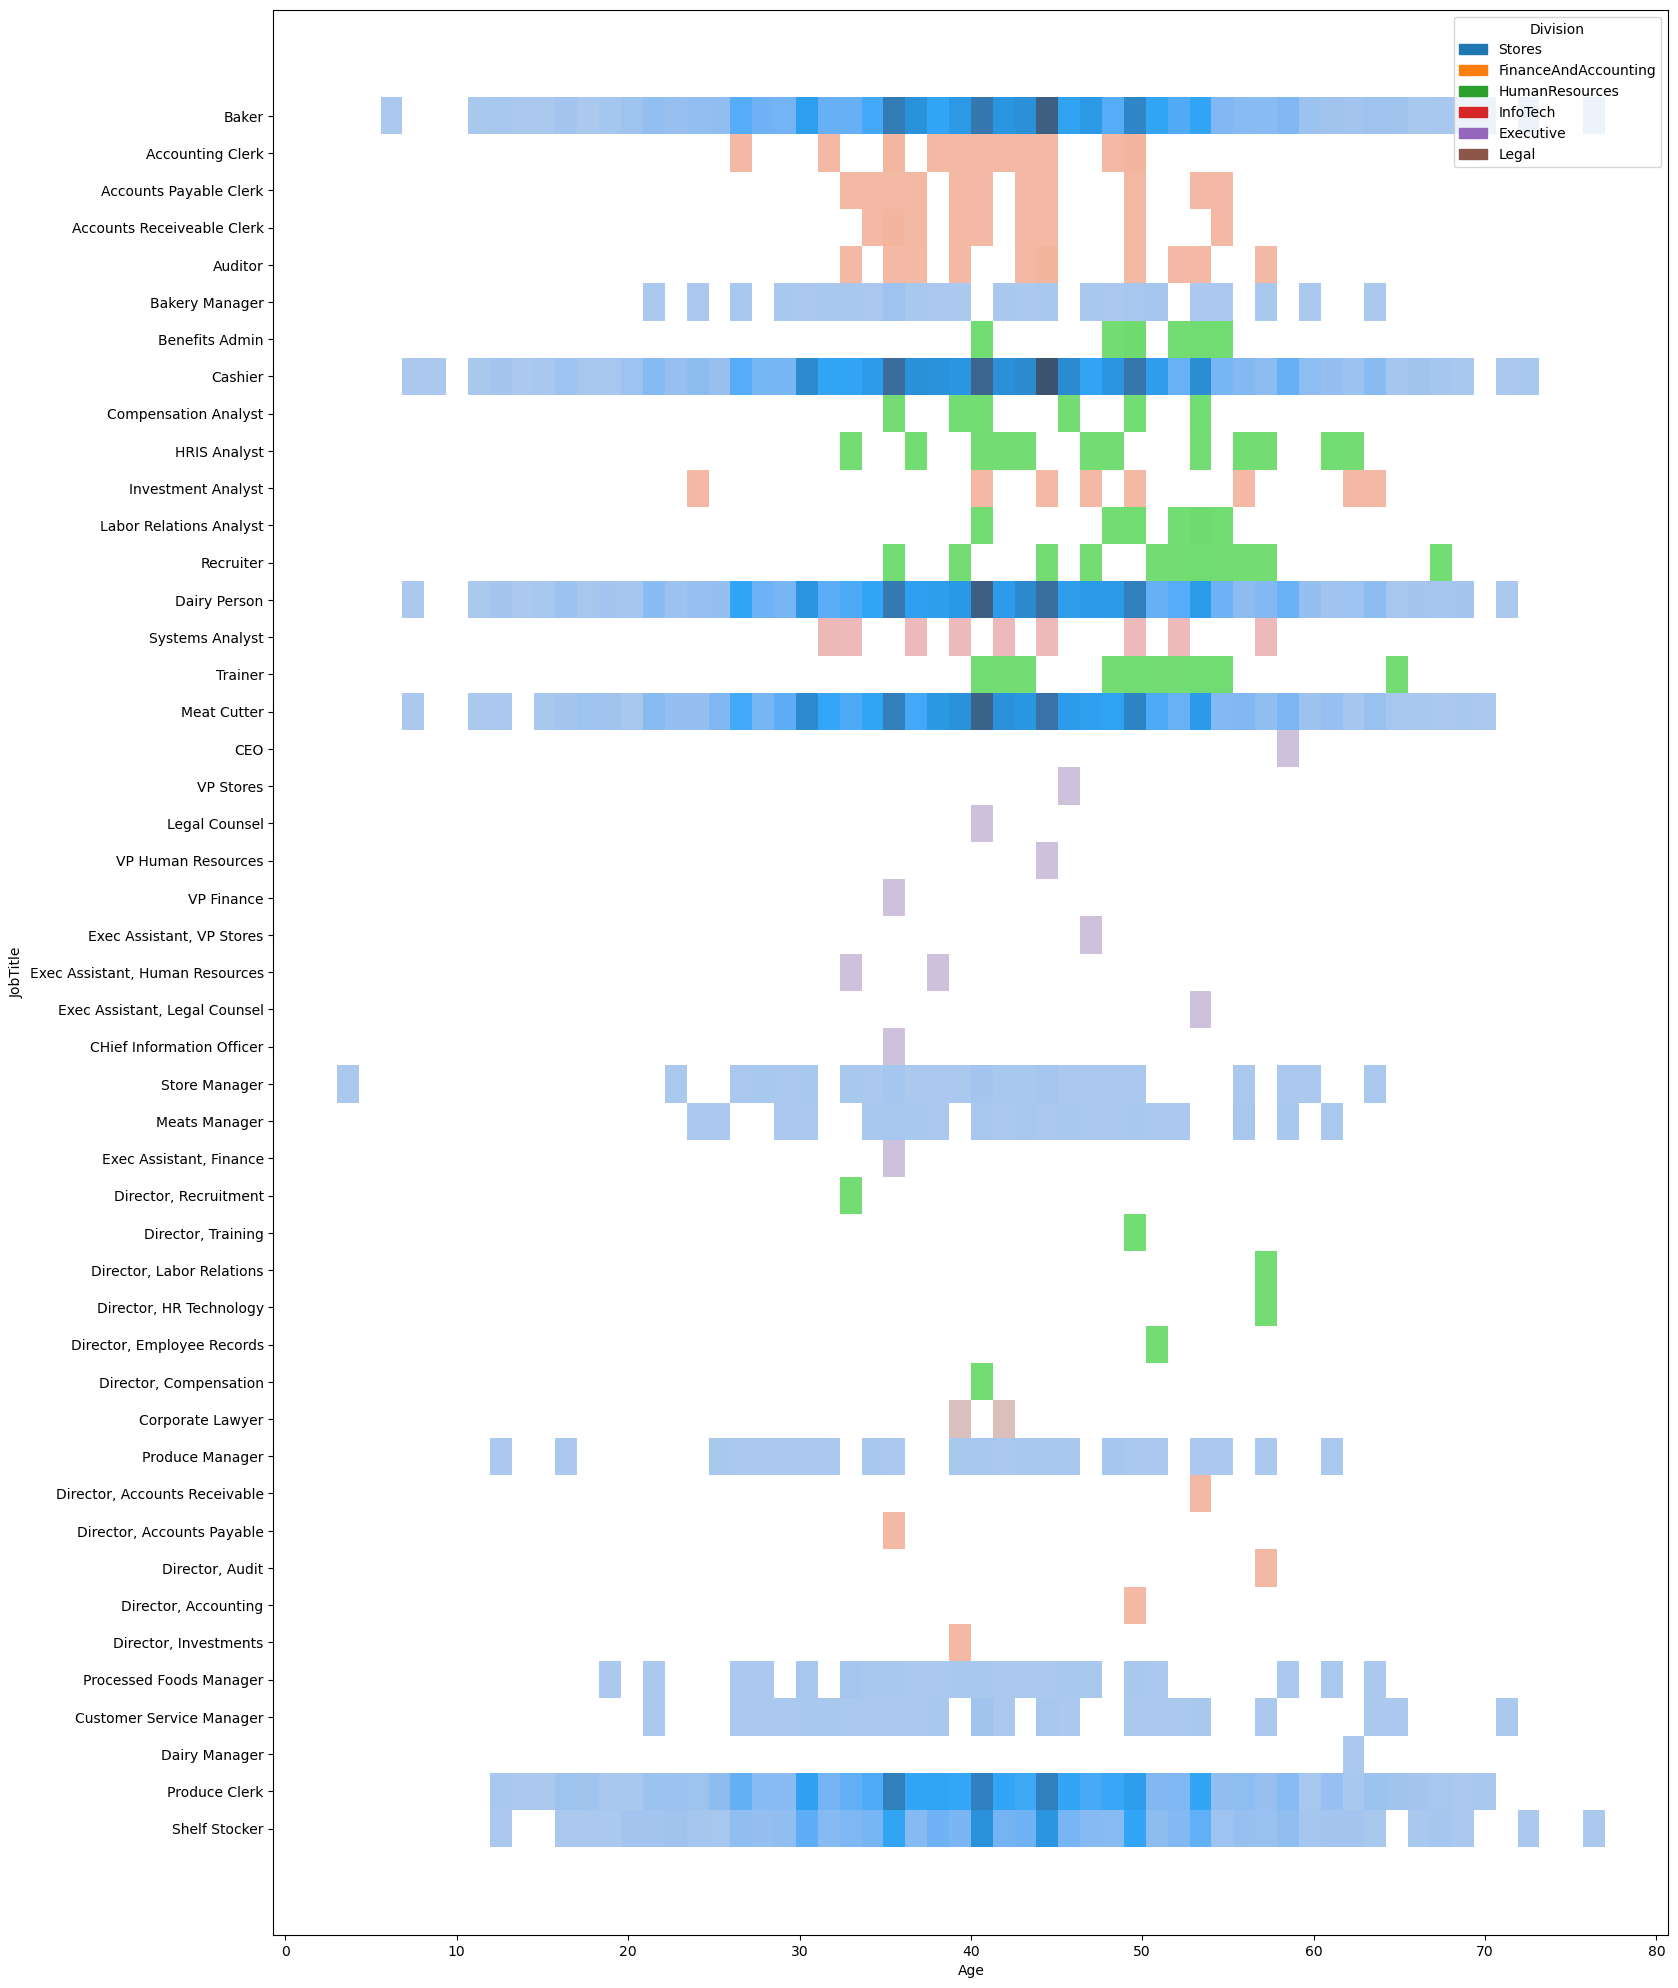

In [33]:
plt.figure(figsize=(18, 25))
ax =sns.histplot(data, x="Age", y="JobTitle", hue="Division", legend=True)
plt.show()

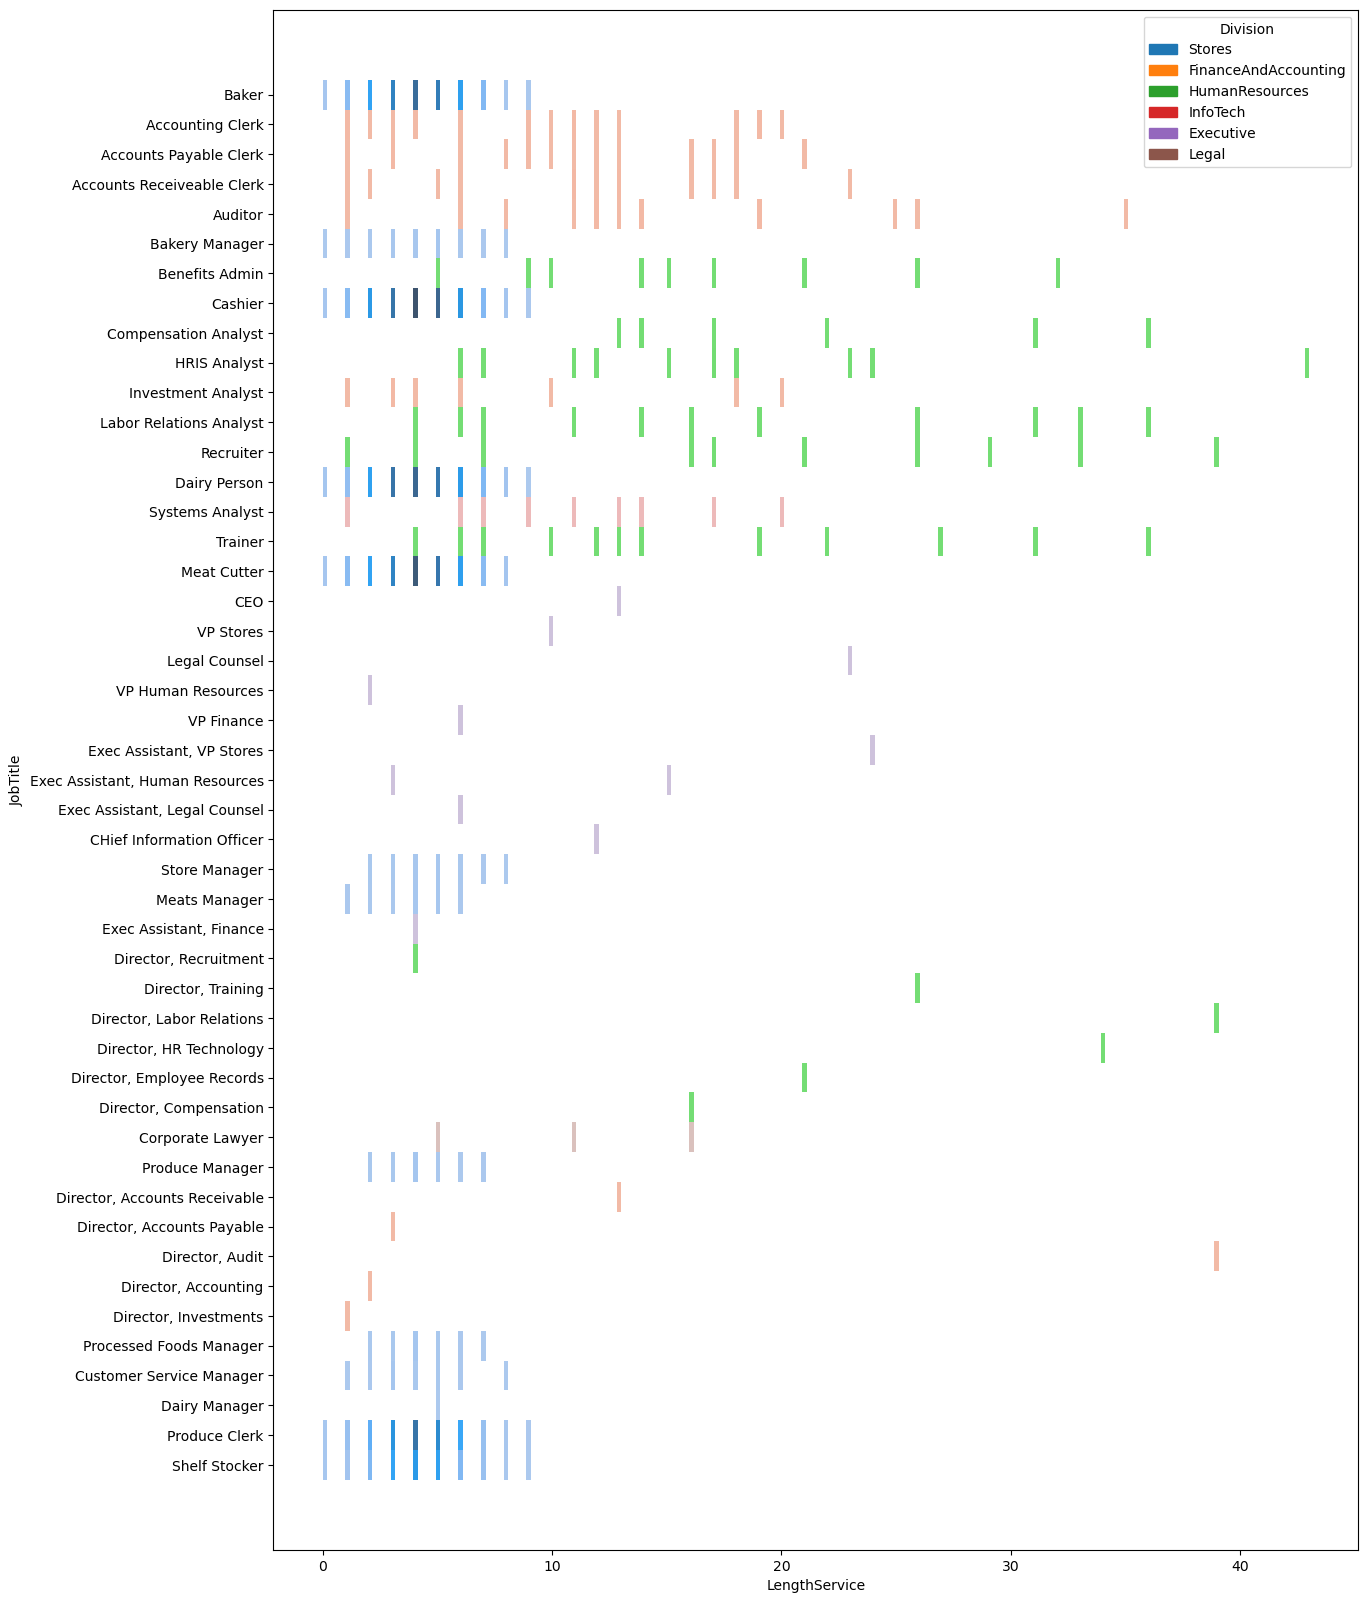

In [34]:
plt.figure(figsize=(14, 20))
ax = sns.histplot(data, x="LengthService", y="JobTitle", hue="Division", legend=True)
plt.show()

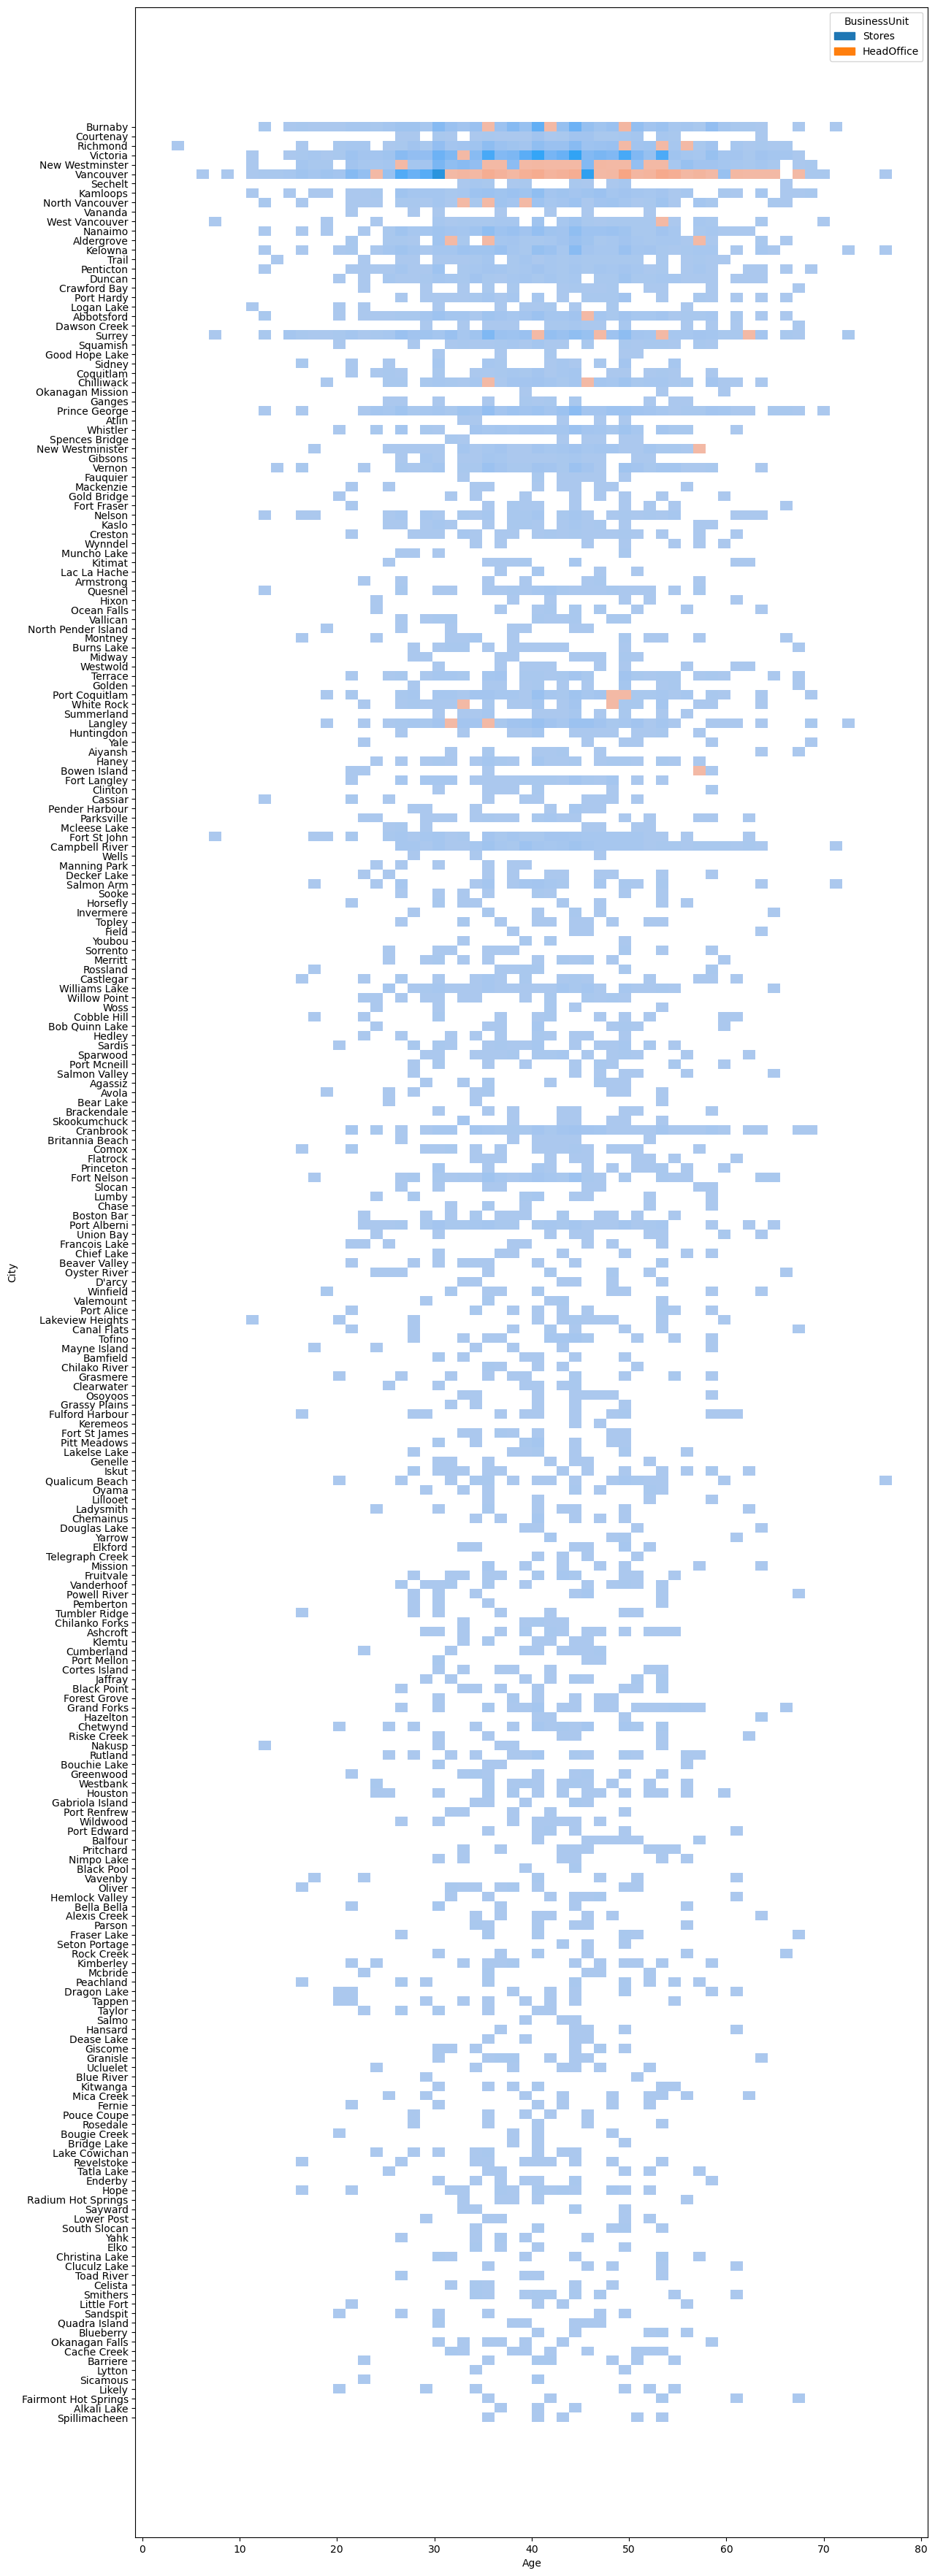

In [35]:
plt.figure(figsize=(14, 45))
ax = sns.histplot(data, x="Age", y="City", hue="BusinessUnit", legend=True)
plt.show()

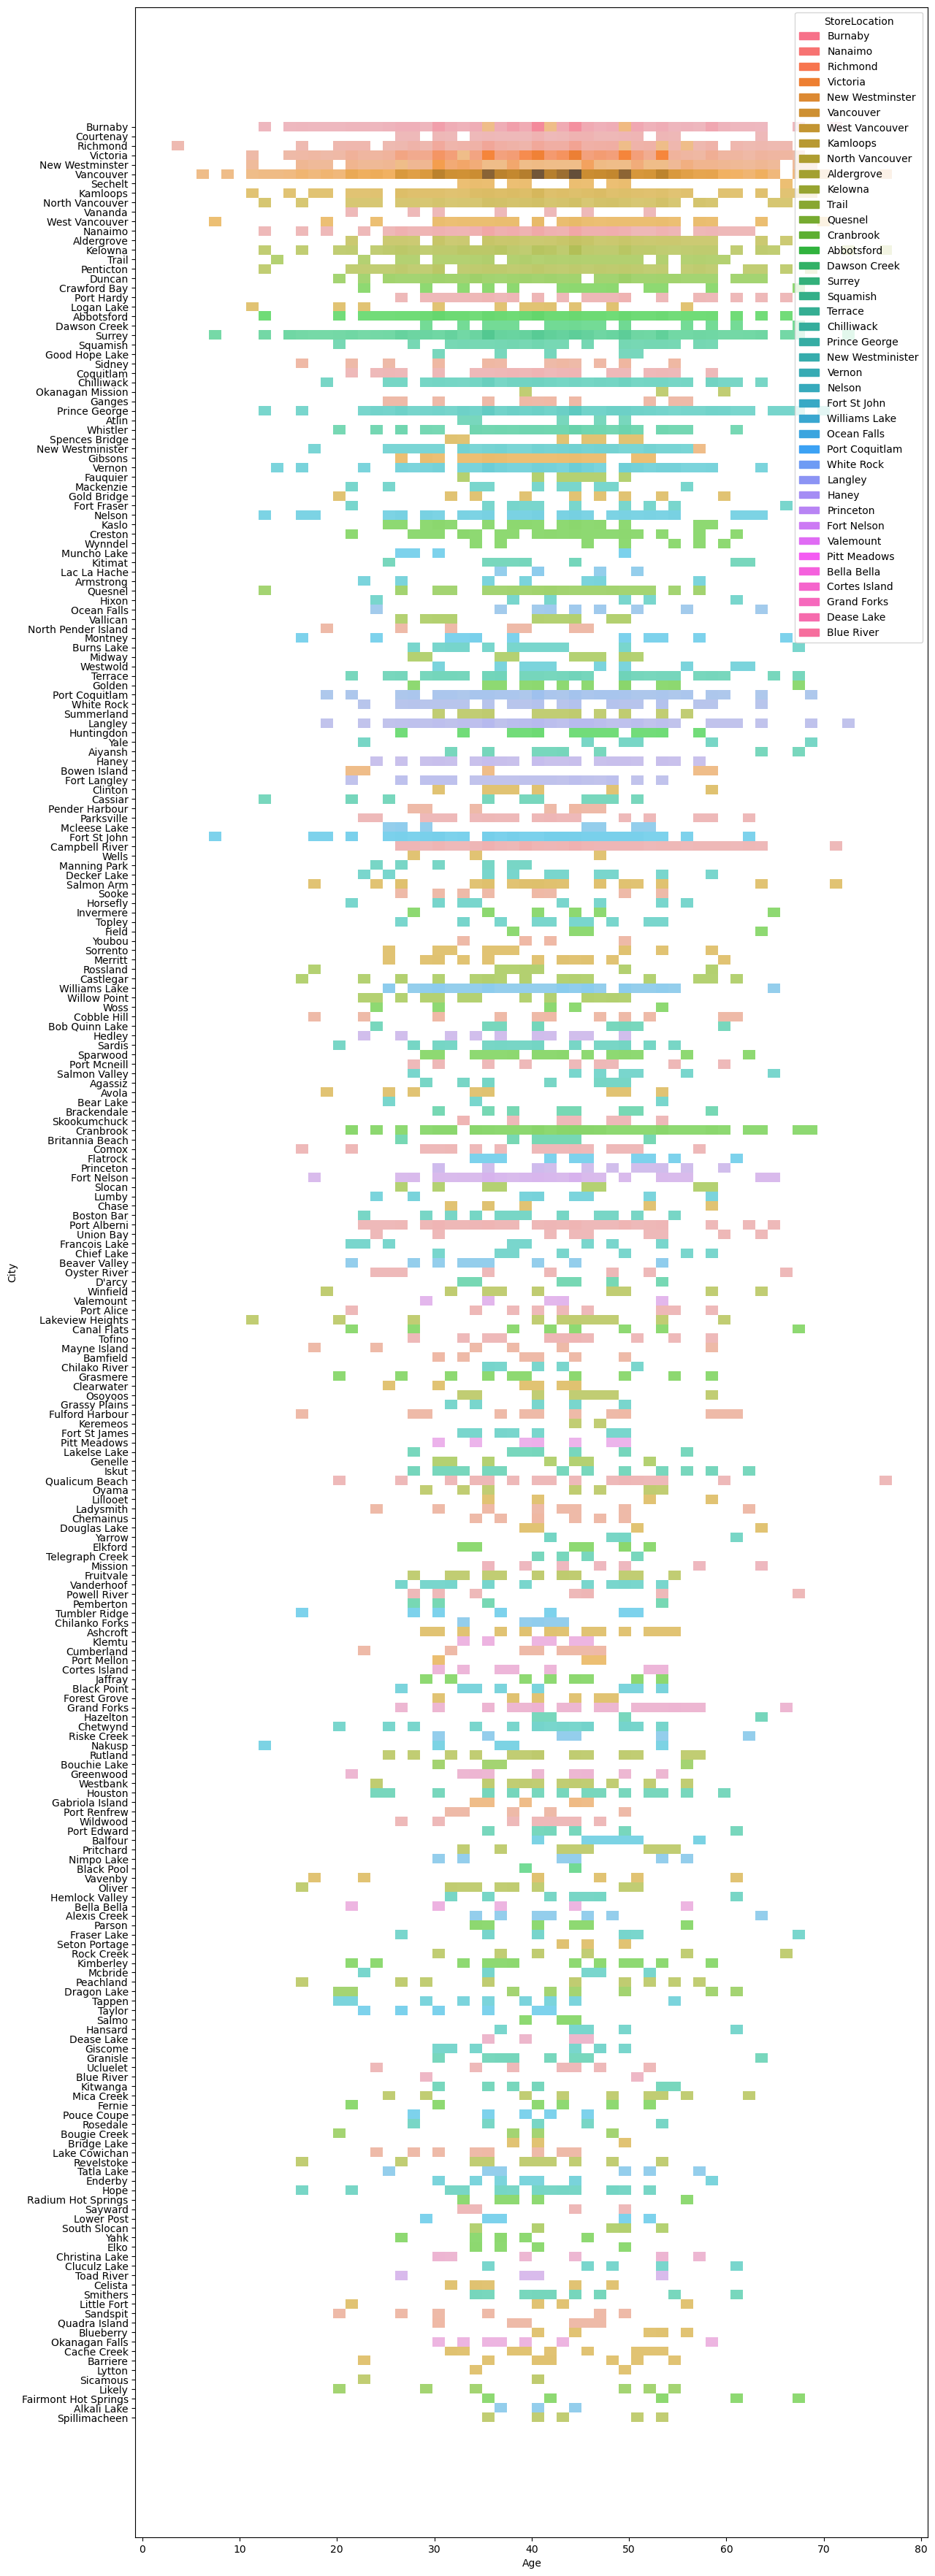

In [36]:
plt.figure(figsize=(14, 45))
ax = sns.histplot(data, x="Age", y="City", hue="StoreLocation", legend=True)
plt.show()

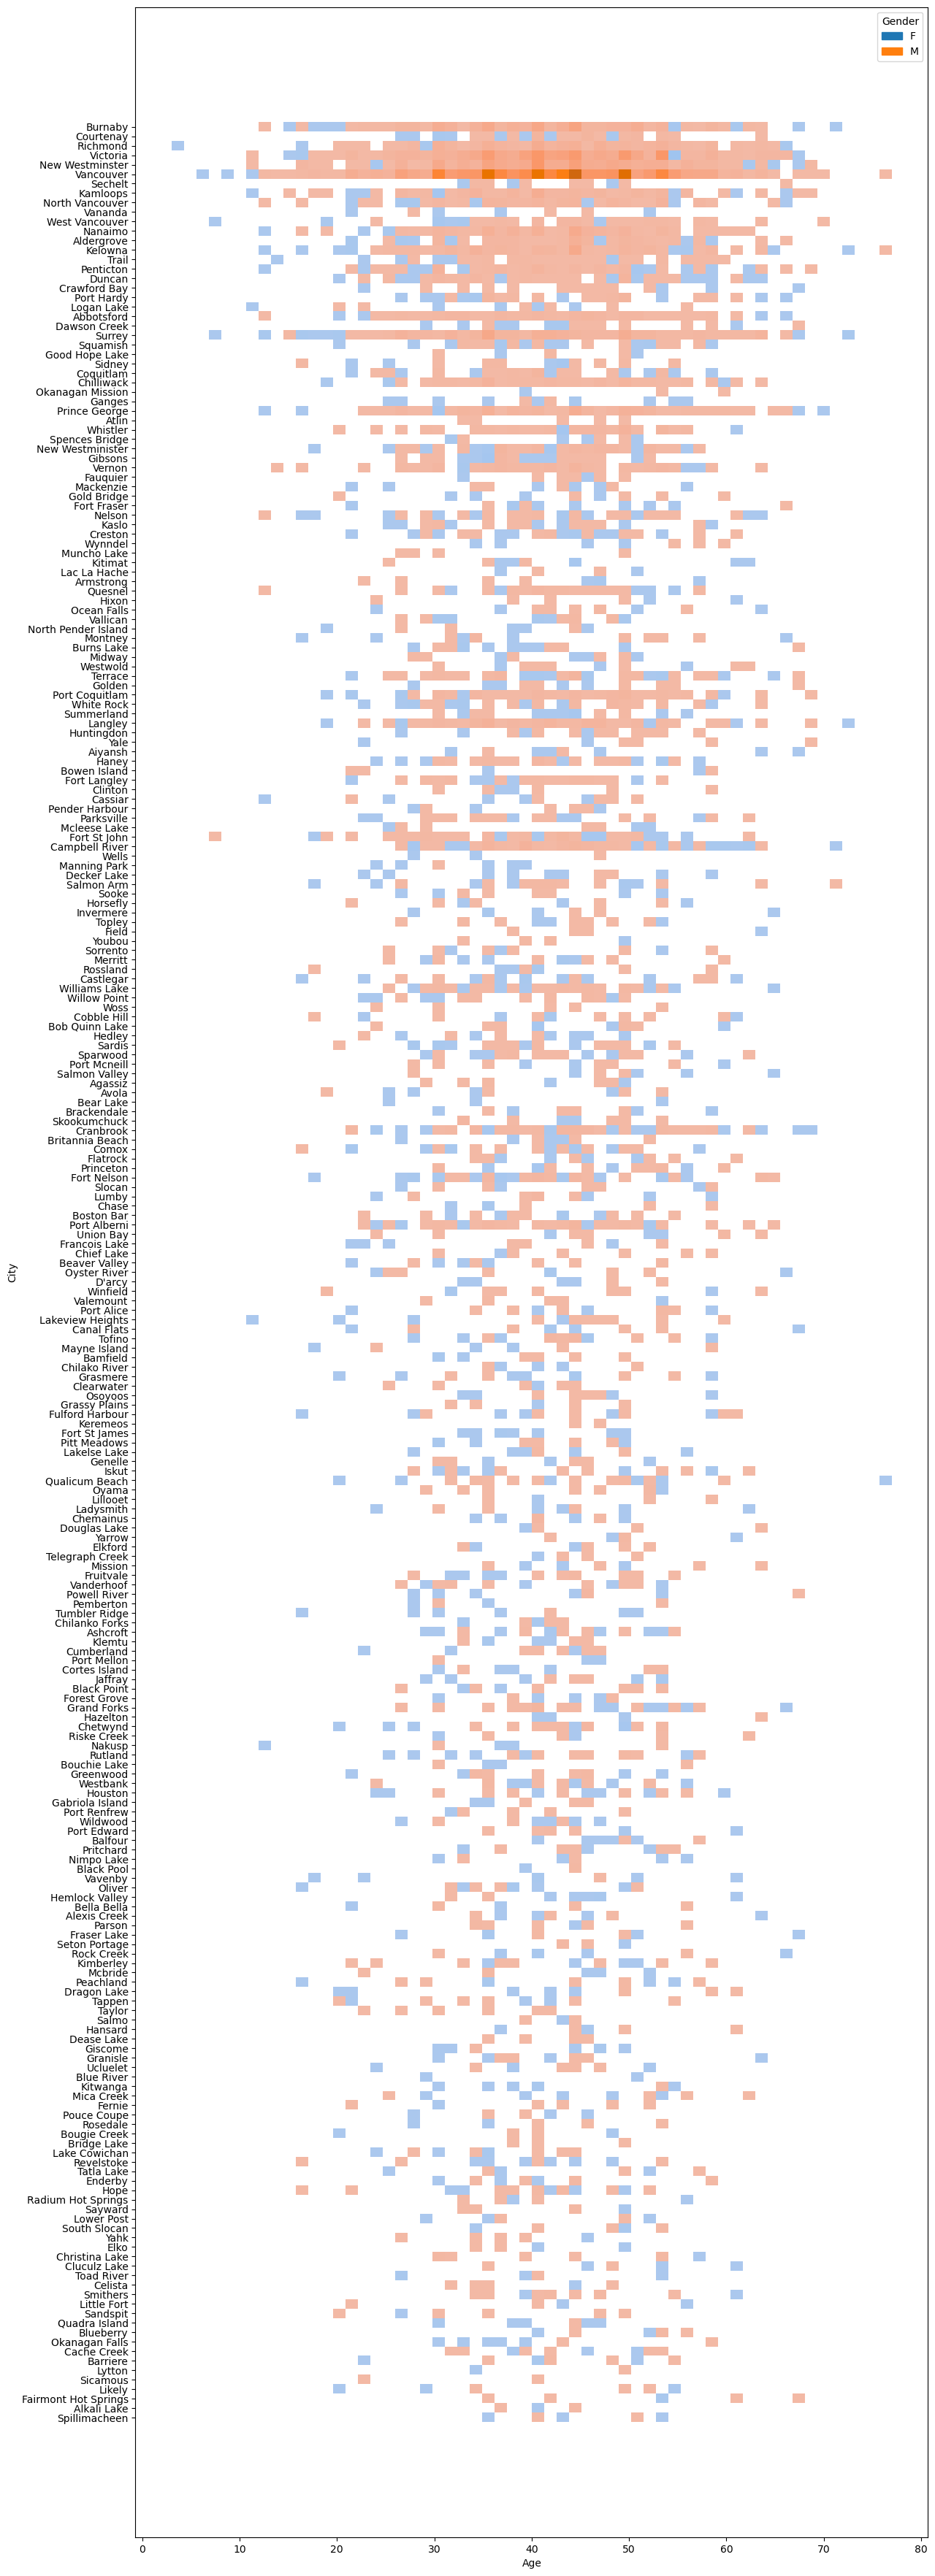

In [37]:
plt.figure(figsize=(14,45))
ax = sns.histplot(data, x="Age", y="City", hue="Gender", legend=True)
plt.show()

In [38]:
def total_count(dataframes, col_name):
    
    value_counts = dataframes[col_name].value_counts()
    result_list = []
    for value, count in value_counts.items():
        result_list.append({col_name: value, "Counts": count})
    result_df = pd.DataFrame(result_list)

    return result_df


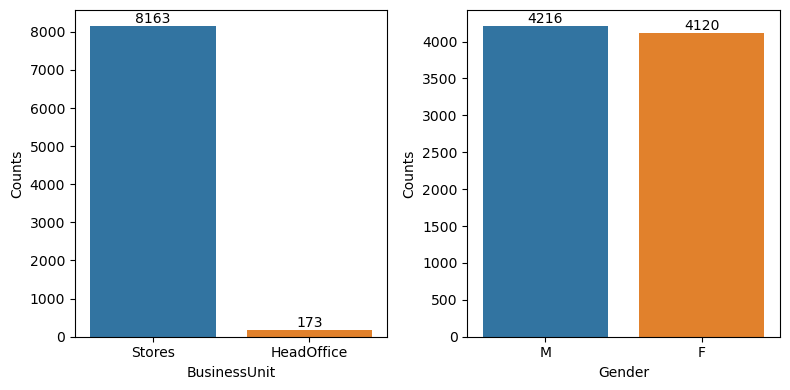

In [39]:
def subplots(columns,dataframe):
    size = len(columns) // 2
    #size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(8, 4 * size))
    axes = axes.flatten()
    for i, col in enumerate(columns):
        counts_df = total_count(dataframe, col)
    
        ax = sns.barplot(data=counts_df, x=col, y="Counts", ax=axes[i])
        ax.set_xlabel(col)
        ax.set_ylabel("Counts")
        ax.bar_label(ax.containers[0], fontsize=10)
    plt.tight_layout()
    plt.show()
subplots(["BusinessUnit","Gender"] ,df)

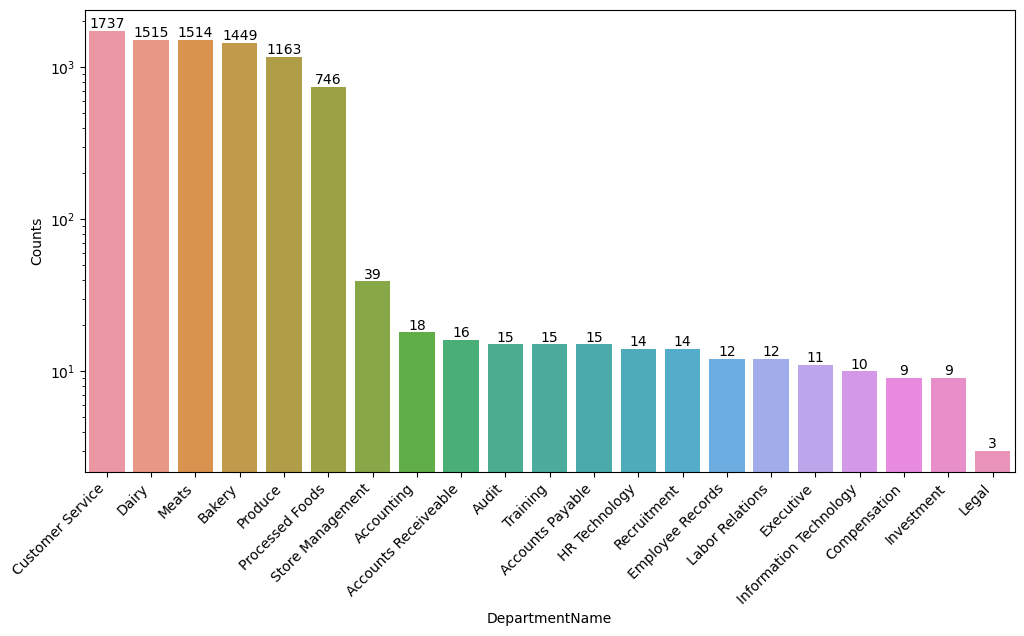

In [40]:
plt.figure(figsize=(12, 6))
a = total_count(df,"DepartmentName")
ax = sns.barplot(a,x ="DepartmentName",y="Counts")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yscale("log")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

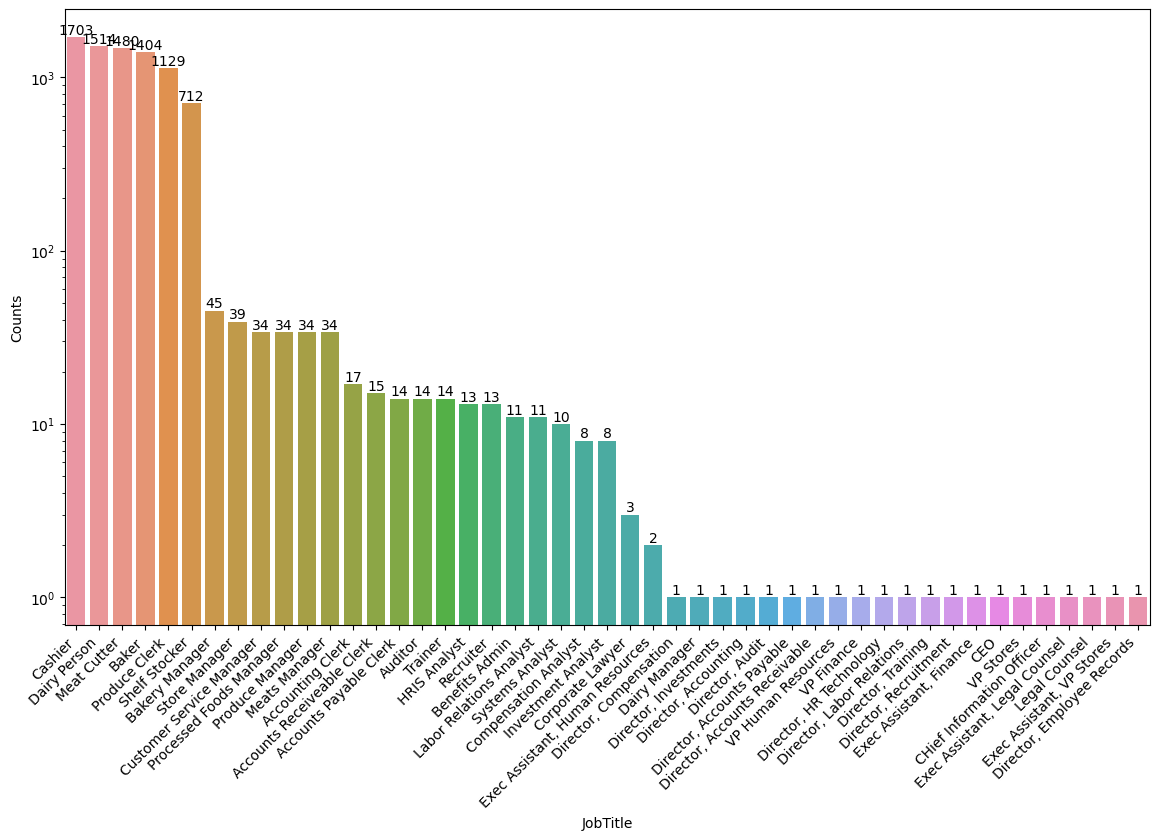

In [41]:
plt.figure(figsize=(14, 8))
a = total_count(df,"JobTitle")
ax = sns.barplot(a,x ="JobTitle",y="Counts")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yscale("log")

plt.show()

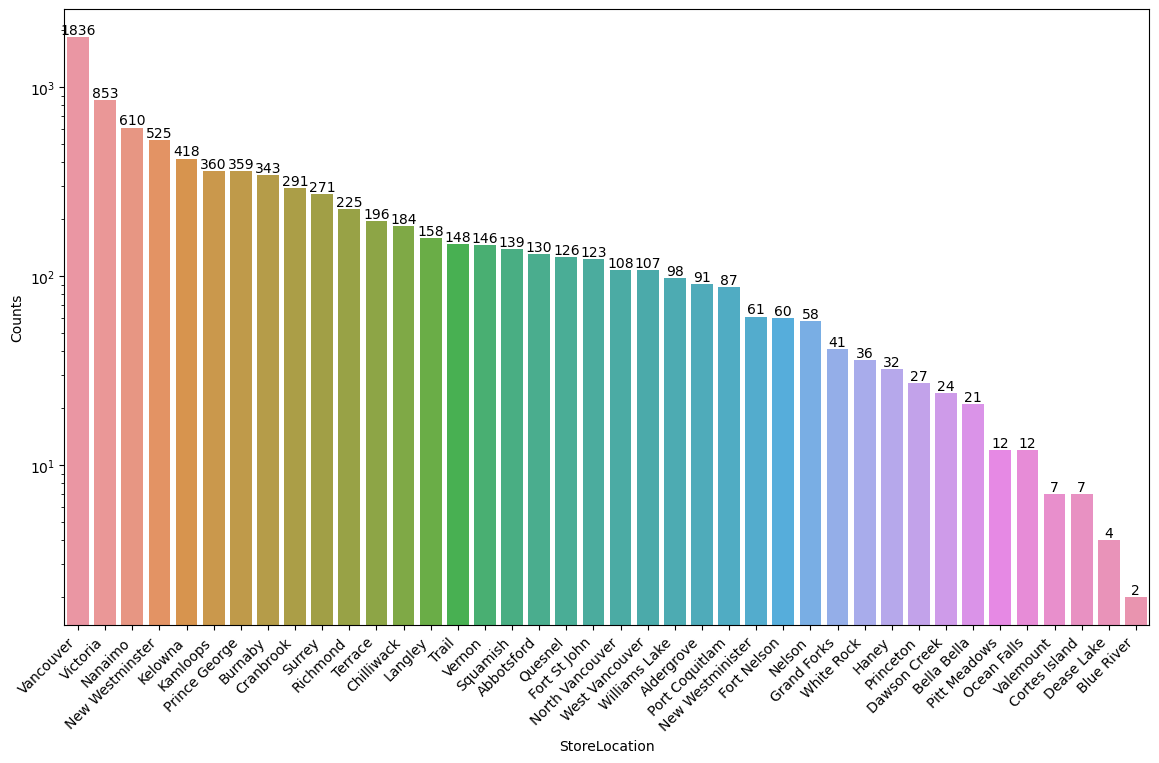

In [42]:
plt.figure(figsize=(14, 8))
a = total_count(df,"StoreLocation")
ax = sns.barplot(a,x ="StoreLocation",y="Counts")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yscale("log")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

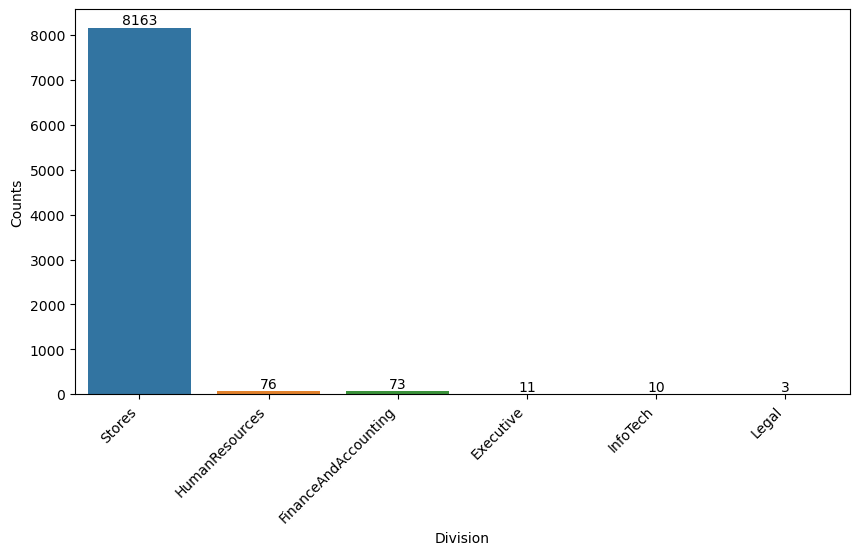

In [43]:
plt.figure(figsize=(10, 5))
a = total_count(df,"Division")
ax = sns.barplot(a,x ="Division",y="Counts")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

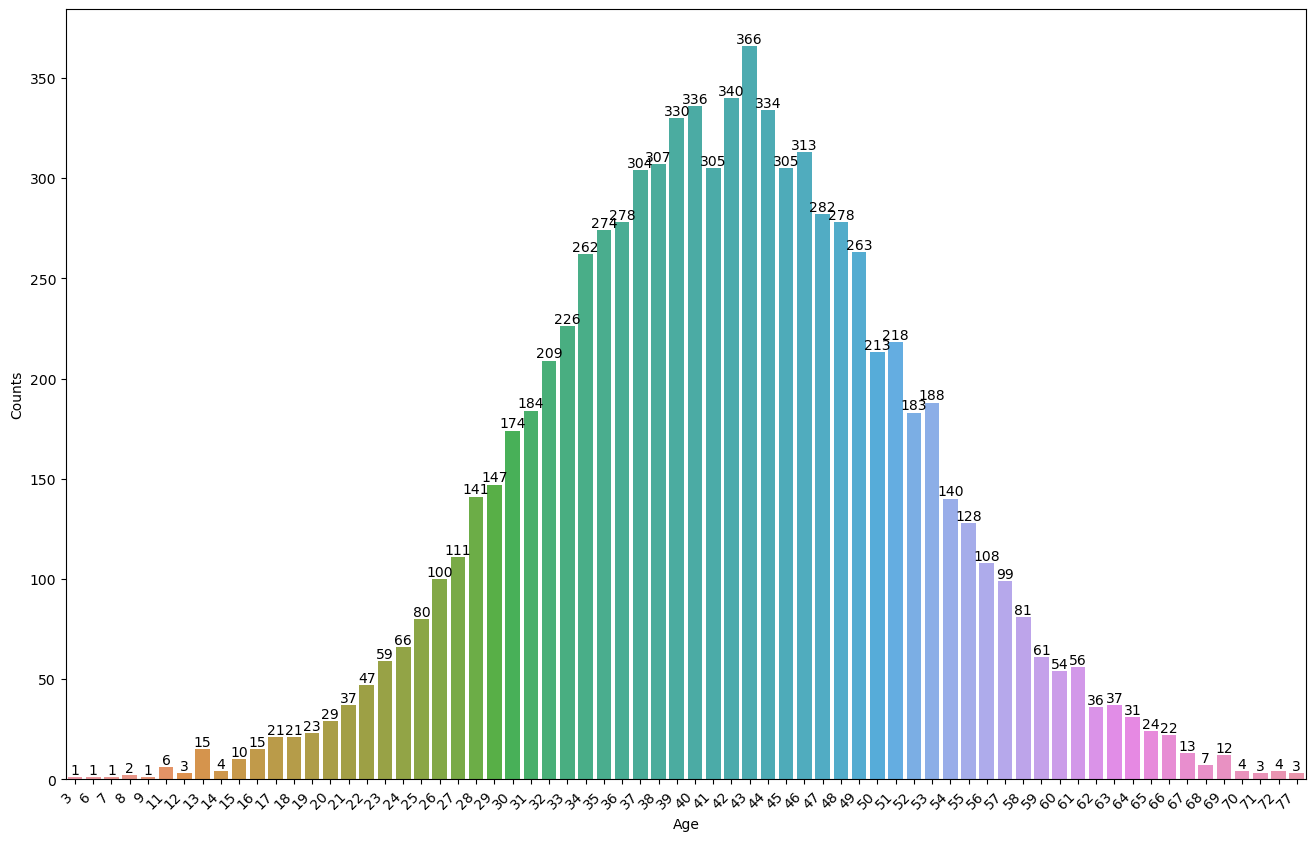

In [44]:
plt.figure(figsize=(16, 10))
a = total_count(df,"Age")
ax = sns.barplot(a,x ="Age",y="Counts")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#ax.set_yscale("log")

plt.show()


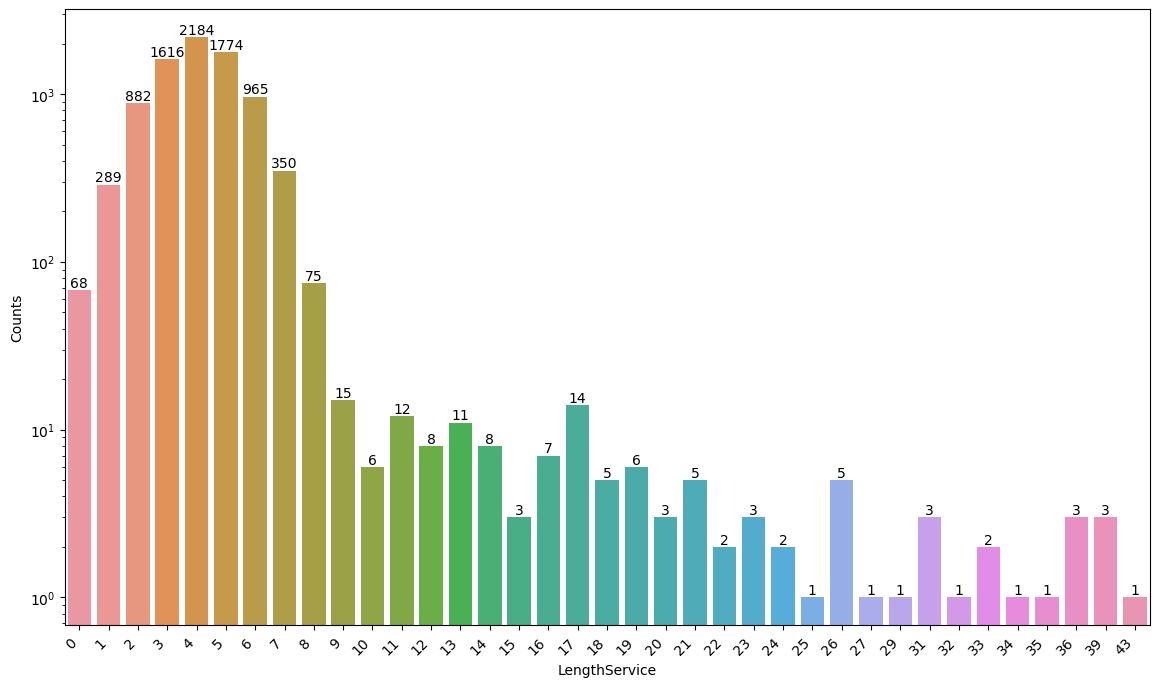

In [45]:
plt.figure(figsize=(14, 8))
a = total_count(df,"LengthService")
ax = sns.barplot(a,x ="LengthService",y="Counts")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yscale("log")

plt.show()


In [46]:
#  Function for Ploting the multiple histogram plot to indentify the data distribution



### Data distribution with outlayers

In [47]:
def subplots_box(columns, dataframe):
    num_columns = len(columns)
    size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(10, 4 * size))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=dataframe[col], ax=axes[i])
        axes[i].set_title(col) 
    
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])
        
    plt.tight_layout()
    plt.show()
    
def subplots_his(columns,dataframe):
    #size = len(columns) // 2
    num_columns = len(columns)
    size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(10, 4 * size))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(data=dataframe, x=col, kde=True,bins=20,edgecolor='black',ax=axes[i])
        #axes[i].set_title(col) 
    
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])
        
    plt.tight_layout()
    plt.show()


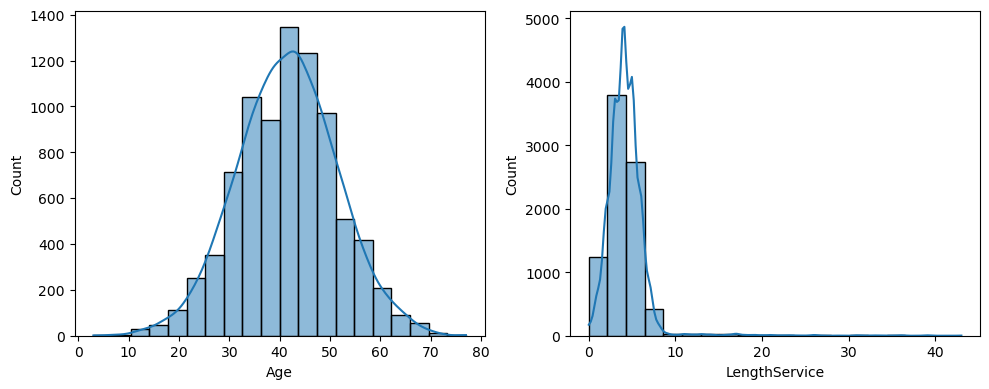

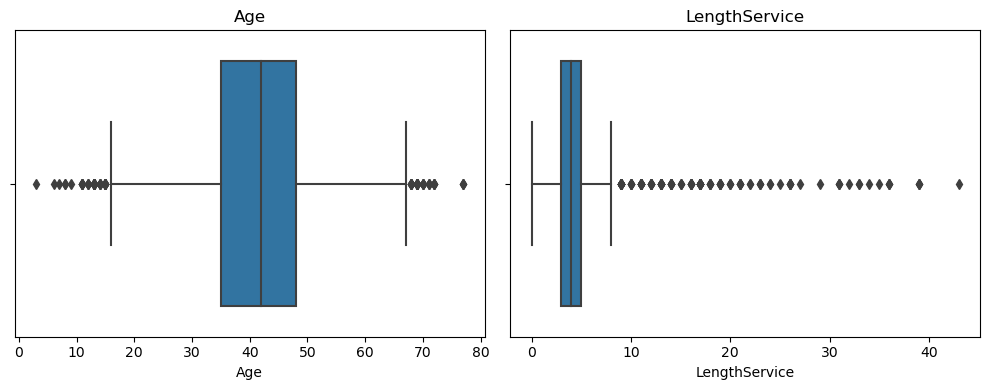

In [48]:
col = ["Age","LengthService"]
subplots_his(col, df)
subplots_box(col, df)

## Handling the  Outlayers

1.**Standardization Method**

2.**IQR based method***

### Standardization Method

In [49]:
col = ["Age","LengthService"]
def sd_out(dataframe, col_names):
    for i in col_names:
        higher_bound = dataframe[i].mean() + 3 * dataframe[i].std()
        lower_bound = dataframe[i].mean() - 3 * dataframe[i].std()
        dataframe = dataframe[(dataframe[i] < higher_bound) & (dataframe[i] > lower_bound)]
    
    return dataframe

df_sd =sd_out(df, col)
df_sd      

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32,6,36,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40,5,30,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48,4,83,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44,3,70,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35,3,0,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46,4,93,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34,2,0,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58,4,176,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43,6,60,Stores


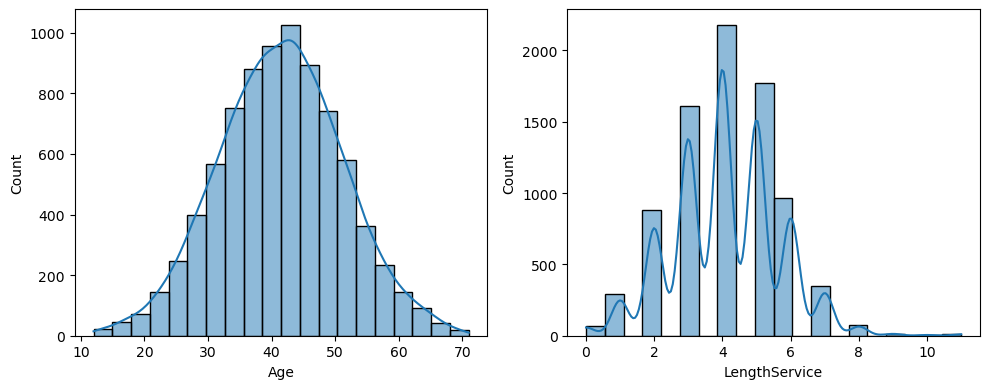

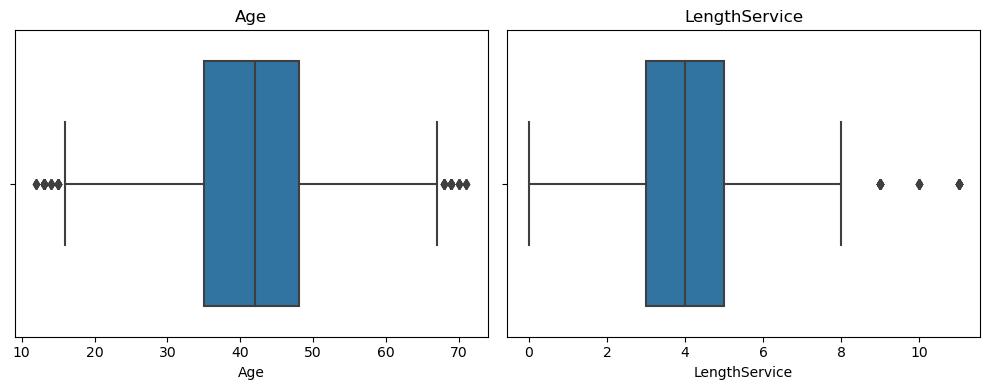

In [50]:
subplots_his(col, df_sd)
subplots_box(col, df_sd)

### IQR based method

In [51]:
col = ["Age","LengthService"]
def iqr_out(dataframe,col_names):
    for col in col_names:
        percentaile25 = df[col].quantile(0.25)
        percentaile75 = df[col].quantile(0.75)
        iqr =percentaile75 -  percentaile25
        upper_limit = percentaile75 +1.5 *iqr
        lower_limit = percentaile25-1.5*iqr
        dataframe = dataframe[(dataframe[col] < upper_limit) & (dataframe[col] > lower_limit)]
        
    return dataframe

df_iqr =iqr_out(df, col)
df_iqr = df_iqr.reset_index(drop=True)
df_iqr

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32,6,36,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40,5,30,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48,4,83,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44,3,70,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35,3,0,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46,4,93,Stores
7981,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34,2,0,Stores
7982,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58,4,176,Stores
7983,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43,6,60,Stores


In [52]:
df_iqr.shape

(7985, 13)

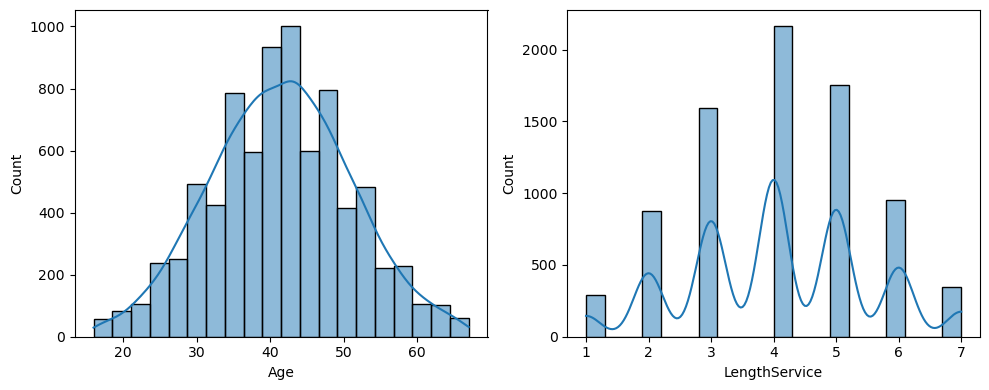

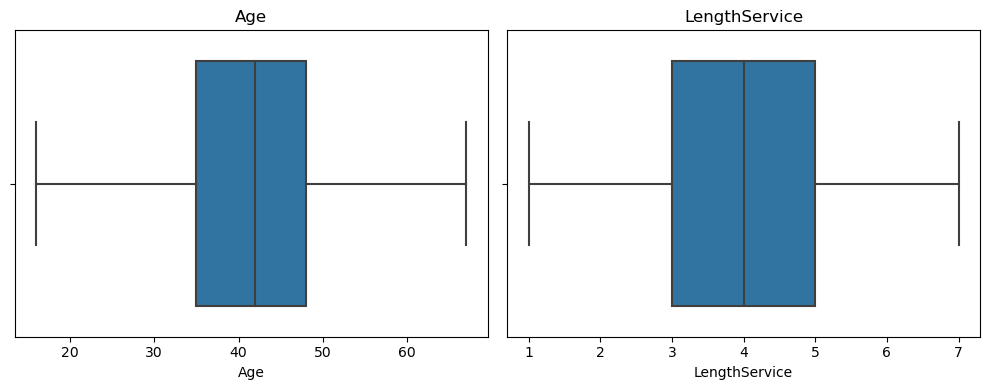

In [53]:
subplots_his(col, df_iqr)
subplots_box(col, df_iqr)

# Without PCA 

### Applying Standard scalar

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_iqr.copy()
col = ["Age","LengthService"]

col_names = col

features = df_scaled[col_names]
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,-0.988456,1.354841,36,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,-0.155122,0.656113,30,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,0.678213,-0.042615,83,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,0.261545,-0.741343,70,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,-0.675956,-0.741343,0,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,0.469879,-0.042615,93,Stores
7981,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,-0.780123,-1.440071,0,Stores
7982,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,1.719881,-0.042615,176,Stores
7983,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,0.157379,1.354841,60,Stores


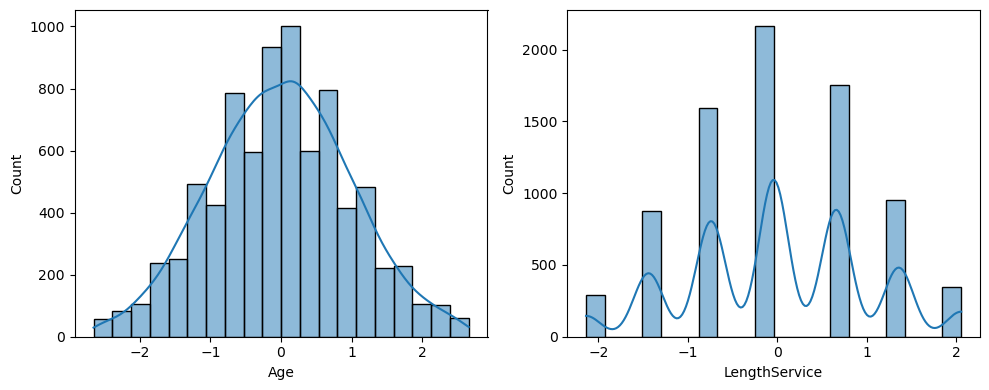

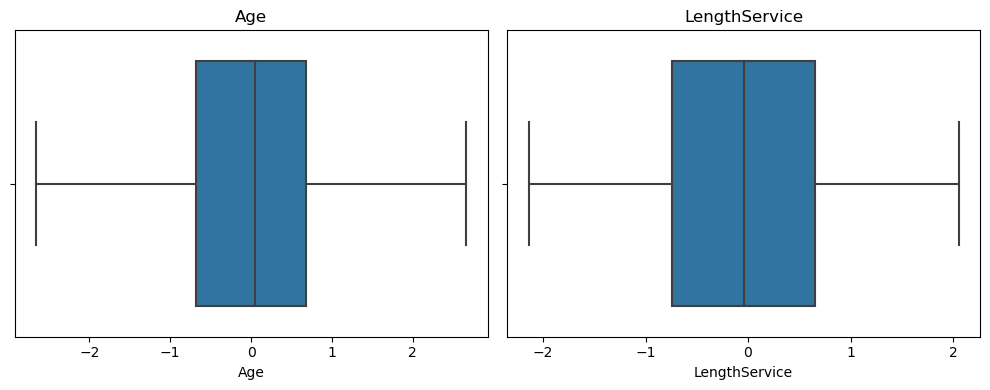

In [55]:
subplots_his(col, df_scaled)
subplots_box(col, df_scaled)

## Dividing the Feature dataset and the Predicting dataset

In [56]:
Feature_dataset = df_scaled.drop("AbsentHours",axis=1)
Predict_dataset = df_scaled["AbsentHours"]
Feature_dataset.shape
Feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7985 entries, 0 to 7984
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  7985 non-null   int64  
 1   Surname         7985 non-null   object 
 2   GivenName       7985 non-null   object 
 3   Gender          7985 non-null   object 
 4   City            7985 non-null   object 
 5   JobTitle        7985 non-null   object 
 6   DepartmentName  7985 non-null   object 
 7   StoreLocation   7985 non-null   object 
 8   Division        7985 non-null   object 
 9   Age             7985 non-null   float64
 10  LengthService   7985 non-null   float64
 11  BusinessUnit    7985 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 748.7+ KB


In [57]:
Predict_dataset.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7985 entries, 0 to 7984
Series name: AbsentHours
Non-Null Count  Dtype
--------------  -----
7985 non-null   int32
dtypes: int32(1)
memory usage: 31.3 KB


## Apply the Oridinal encoder for handling the categorical values¶

In [58]:
from sklearn.preprocessing import OrdinalEncoder

Feature_dataset = Feature_dataset.drop(['Surname', 'GivenName',"EmployeeNumber"], axis=1)

cat_cols = Feature_dataset.select_dtypes(include=['object']).columns


for col in cat_cols:
    oe = OrdinalEncoder()
    Feature_dataset[col] = oe.fit_transform(Feature_dataset[[col]])
Feature_dataset

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,BusinessUnit
0,0.0,28.0,4.0,4.0,4.0,5.0,-0.988456,1.354841,1.0
1,1.0,51.0,4.0,4.0,17.0,5.0,-0.155122,0.656113,1.0
2,1.0,179.0,4.0,4.0,28.0,5.0,0.678213,-0.042615,1.0
3,0.0,226.0,4.0,4.0,36.0,5.0,0.261545,-0.741343,1.0
4,1.0,143.0,4.0,4.0,20.0,5.0,-0.675956,-0.741343,1.0
...,...,...,...,...,...,...,...,...,...
7980,0.0,120.0,7.0,5.0,16.0,5.0,0.469879,-0.042615,1.0
7981,1.0,137.0,7.0,5.0,11.0,5.0,-0.780123,-1.440071,1.0
7982,0.0,228.0,7.0,5.0,37.0,5.0,1.719881,-0.042615,1.0
7983,0.0,222.0,11.0,6.0,34.0,5.0,0.157379,1.354841,1.0


## Spliting the dataet into Training and Test dataset

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x_train,x_test,y_train,y_test, = train_test_split(Feature_dataset,Predict_dataset,test_size=0.20,random_state=56)

### MLR

A multiple regression considers the effect of more than one explanatory variable on some outcome of interest. It evaluates the relative effect of these explanatory, or independent, variables on the dependent variable when holding all the other variables in the model constant.

In [60]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)
y_pred

array([53.92496393, 97.20460001, 84.74850141, ..., 29.34642139,
       76.88603339, 81.84893118])

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.06595485271855
Mean Squared Error: 585.8120550951453
Root Mean Squared Error: 24.203554596280796



The provided metrics for Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) suggest the following inference for the regression model:

#### Mean Absolute Error (MAE):

The MAE is approximately 19.07. This metric represents the average absolute difference between the actual and predicted values. A lower MAE indicates that, on average, the model's predictions are relatively close to the actual values.
##### Mean Squared Error (MSE):

The MSE is approximately 585.81. This metric is the average of the squared differences between the actual and predicted values. While the absolute magnitude of MSE may not provide clear interpretability, lower values are generally desirable.
##### Root Mean Squared Error (RMSE):

The RMSE is approximately 24.20. This is the square root of MSE and is in the same unit as the target variable. RMSE provides an interpretable measure of the spread of errors, and lower values indicate better model performance.
Inference based on these metrics:

##### Moderate Model Performance:

The MAE, MSE, and RMSE values are moderate, suggesting that the regression model is making predictions with a reasonable level of accuracy. However, the interpretation depends on the specific context of the problem.

In [63]:
coefficients = pd.DataFrame({'Variable': Feature_dataset.columns, 'Coefficient': model.coef_})
print(coefficients)

         Variable  Coefficient
0          Gender   -15.934948
1            City     0.003950
2        JobTitle     0.304644
3  DepartmentName    -0.566069
4   StoreLocation    -0.013949
5        Division    -4.080170
6             Age    41.209544
7   LengthService    -0.207914
8    BusinessUnit    31.126492


### RFR

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
x_train,x_test,y_train,y_test, = train_test_split(Feature_dataset,Predict_dataset,test_size=0.20,random_state=56)

In [66]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred = rf_model.predict(x_test)
y_pred

array([ 46.065     , 101.55583333, 101.755     , ...,  15.36      ,
        39.64933333,  55.52333333])

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 631.7479170908834
R-squared: 0.7320884156364404


The provided metrics for Random Forest Regression (RFR) are as follows:

#### Mean Squared Error (MSE):

MSE is approximately 631.75. This metric represents the average of the squared differences between the actual and predicted values. A lower MSE is generally desirable, indicating smaller errors on average.
##### R-squared (R²):

R-squared is approximately 0.7321. R-squared is a measure of how well the model's predictions match the actual values. It ranges from 0 to 1, with 1 indicating a perfect fit. A value of 0.7321 suggests that the model explains about 73.21% of the variance in the target variable.

### Inference based on these metrics:

#### Moderate Model Performance:

The MSE value of 631.75 indicates that, on average, the squared differences between the predicted and actual values are moderately high. The model might have room for improvement in reducing prediction errors.

# With PCA

In [69]:
Feature_dataset["Ab_Hours"] = df_iqr["AbsentHours"]
Feature_dataset

,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,BusinessUnit,Ab_Hours
0,0.0,28.0,4.0,4.0,4.0,5.0,-0.988456,1.354841,1.0,36
1,1.0,51.0,4.0,4.0,17.0,5.0,-0.155122,0.656113,1.0,30
2,1.0,179.0,4.0,4.0,28.0,5.0,0.678213,-0.042615,1.0,83
3,0.0,226.0,4.0,4.0,36.0,5.0,0.261545,-0.741343,1.0,70
4,1.0,143.0,4.0,4.0,20.0,5.0,-0.675956,-0.741343,1.0,0
...,...,...,...,...,...,...,...,...,...,...
7980,0.0,120.0,7.0,5.0,16.0,5.0,0.469879,-0.042615,1.0,93
7981,1.0,137.0,7.0,5.0,11.0,5.0,-0.780123,-1.440071,1.0,0
7982,0.0,228.0,7.0,5.0,37.0,5.0,1.719881,-0.042615,1.0,176
7983,0.0,222.0,11.0,6.0,34.0,5.0,0.157379,1.354841,1.0,60


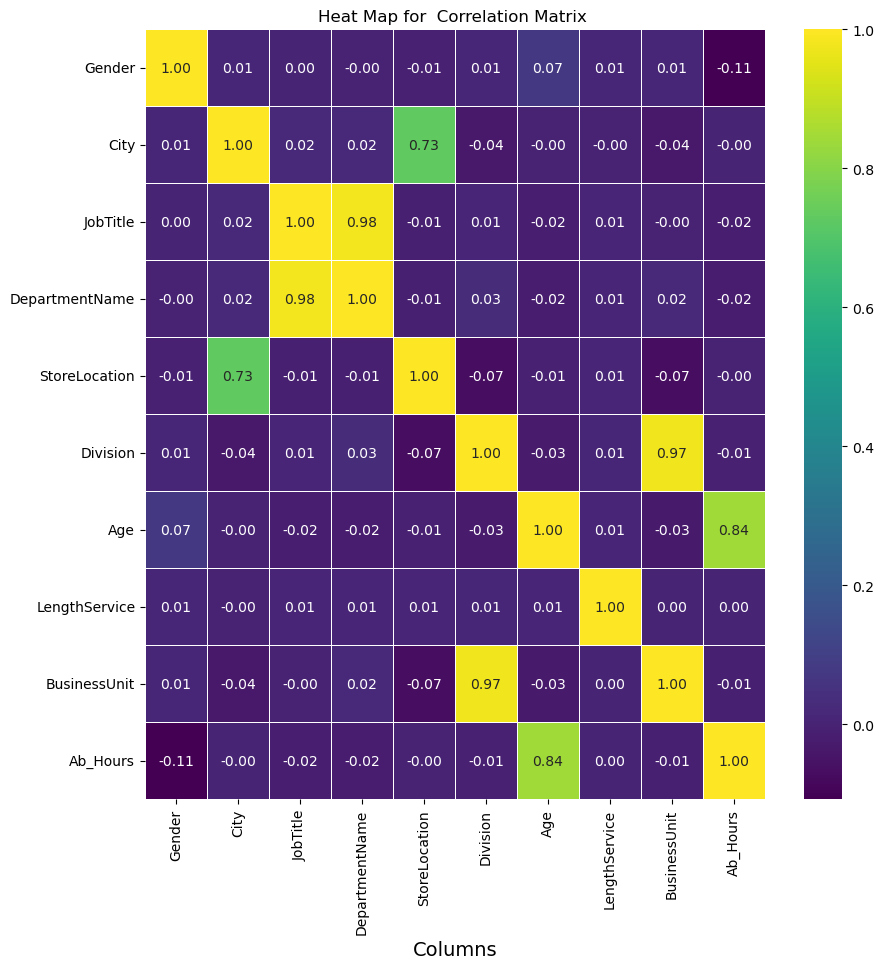

In [70]:
corr = Feature_dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,cmap='viridis',linewidth=.5,fmt='.2f')
plt.title("Heat Map for  Correlation Matrix ")
plt.xlabel("Columns", fontsize=14)
plt.show()

In [71]:
feature_variable= Feature_dataset[["Age","LengthService"]]
target=Feature_dataset["Ab_Hours"]

# Spliting the dataet into Training and Test dataset 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x_train,x_test,y_train,y_test, = train_test_split(feature_variable,target,test_size=0.20,random_state=56)

# MLR

In [73]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(x_test)
y_pred

array([46.36938514, 88.94084817, 76.23658501, ..., 20.96085882,
       84.70609378, 89.16476733])

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 20.21823772132257
Mean Squared Error: 662.0345445684368
Root Mean Squared Error: 25.730031958169754


The provided metrics for the Multiple Linear Regression (MLR) model are as follows:

#### Mean Absolute Error (MAE):

MAE is approximately 20.22. This metric represents the average absolute difference between the actual and predicted values. Lower MAE values are generally desirable, indicating smaller errors on average.

#### Mean Squared Error (MSE):

MSE is approximately 662.03. This metric is the average of the squared differences between the actual and predicted values. It tends to penalize larger errors more than MAE and is sensitive to outliers.

#### Root Mean Squared Error (RMSE):

RMSE is approximately 25.73. It is the square root of MSE and is in the same unit as the target variable. RMSE provides an interpretable measure of the spread of errors, and lower values indicate better model performance.



***Overall, the provided MLR model is making predictions with a reasonable level of accuracy***

# RFR

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
x_train,x_test,y_train,y_test, = train_test_split(Feature_dataset,Predict_dataset,test_size=0.20,random_state=56)

In [78]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred = rf_model.predict(x_test)
y_pred

array([61., 84., 74., ..., 12., 58., 65.])

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.00484740137758299
R-squared: 0.9999979443145787


The metrics provided for a Random Forest Regression (RFR) model are as follows:

#### Mean Squared Error (MSE):

MSE is approximately 0.00485. This metric represents the average of the squared differences between the actual and predicted values. Lower MSE values indicate better model performance.

#### R-squared (R²):

R-squared is approximately 0.999998. R-squared is a measure of how well the model's predictions match the actual values. It ranges from 0 to 1, with 1 indicating a perfect fit. A value close to 1 suggests that the model explains a high proportion of the variance in the target variable.
Inference based on these metrics:

#### Excellent Model Performance:

The very low MSE value (0.00485) indicates that the Random Forest Regression model is making predictions with very small errors on average. This is a positive sign of accurate predictions.